# **Comportamiento de compras de clientes en marcado Retail**


En el dinámico mundo del retail, comprender el comportamiento del cliente basados en datos es la clave para seguir creciendo y evolucionando a un mundo que va girando rápidamente. En este proyecto, buscamos identificar los patrones de compra de clientes en una empresa minorista, utilizando técnicas de análisis de datos como RFM y Clustering. Nuestro objetivo es identificar segmentos de clientes con características similares, anticipar sus necesidades y desarrollar estrategias de que impulsen la retención, la satisfacción del cliente y la rentabilidad y desarrollo de la empresa.

**Objetivo General:**

Comprender a fondo el comportamiento de compra de los clientes de la empresa minorista.

**Objetivos Específicos:**

- Segmentar a los clientes en función de su Recencia (R), Frecuencia (F) y Valor monetario (M) utilizando el análisis RFM.

- Analizar los segmentos de clientes identificados mediante técnicas de Clustering.

- Identificar los factores que influyen en el comportamiento de compra de cada segmento de clientes.

#Inicialización y vista previa

# Librerias


In [ ]:
import gdown #gdown para descargar el archivo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
import json

# Carga de Data

In [ ]:
# ID del archivo compartido
file_id = '17L9aHcUU8lCc88SPPbx7qULuryvcYxXr'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

# Carga del dataset
df = pd.read_csv(output, encoding='latin1')

# Mostrar las primeras filas del dataset
df.head()



Downloading...
From: https://drive.google.com/uc?id=17L9aHcUU8lCc88SPPbx7qULuryvcYxXr
To: /content/dataset.csv
100%|██████████| 46.1M/46.1M [00:00<00:00, 127MB/s]


,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom


In [ ]:
# Imprimiendo la información general/resumen sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Descripción de los datos:

- `'INVOICE_NO'` — número de factura
- `'STOCK_CODE'` — identificador único de producto
- `'DESCRIPTION'` — descripción del producto
- `'QUANTITY'` — cantidad de unidades del producto
- `'INVOICE_DATE'` — fecha en que se emitió la factura
- `'UNIT_PRICE'` — precio unitario del producto
- `'CUSTOMER_ID'` — identificador del cliente
- `'REGION'` — país donde se genera la compra

## Tipos de Datos

In [ ]:
# Verificar tipos de datos
df.dtypes

INVOICE_NO       object
STOCK_CODE       object
DESCRIPTION      object
QUANTITY          int64
INVOICE_DATE     object
UNIT_PRICE      float64
CUSTOMER_ID     float64
REGION           object
dtype: object

Modificaremos los tipos de datos al formato correcto

In [ ]:
# Convertir INVOICE_DATE a tipo datetime
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format='%d/%m/%Y %H:%M')

# Nota: el antiguo código no proporcionaba el formato correcto a las fechas, pues tomaba el mes como el día y al día como el mes
# Esa es la justifición de mi cambio
# df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], errors='coerce')

## Descripcion de los datos

In [ ]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99], include='all')

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4214,NaN,NaN,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2020-07-04 08:55:02.927097344,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2019-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2020-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2020-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2020-10-19 11:27:00,4.130000,16791.000000,NaN
95%,NaN,NaN,NaN,29.000000,2020-11-30 14:41:00,9.950000,17905.000000,NaN


In [ ]:
df.describe(exclude=['int', 'float'])

,INVOICE_NO,STOCK_CODE,DESCRIPTION,INVOICE_DATE,REGION
count,541909,541909,540455,541909,541909
unique,25900,4070,4214,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,United Kingdom
freq,1114,2313,2369,NaN,495478
mean,NaN,NaN,NaN,2020-07-04 08:55:02.927097344,NaN
min,NaN,NaN,NaN,2019-12-01 08:26:00,NaN
25%,NaN,NaN,NaN,2020-03-28 11:34:00,NaN
50%,NaN,NaN,NaN,2020-07-19 17:17:00,NaN
75%,NaN,NaN,NaN,2020-10-19 11:27:00,NaN
max,NaN,NaN,NaN,2020-12-09 12:50:00,NaN


## Busqueda de Valores Nulos

In [ ]:
df.isnull().sum().sort_values(ascending=False)

CUSTOMER_ID     135080
DESCRIPTION       1454
INVOICE_NO           0
STOCK_CODE           0
QUANTITY             0
INVOICE_DATE         0
UNIT_PRICE           0
REGION               0
dtype: int64

Observamos que la columna CUSTOMER_ID tiene 135.080 valores nulos. Dado que nuestro proyecto se centra en la segmentación de clientes, estos valores nulos no nos ayudarían a entrenar un modelo de clasificación, ya que no podemos segmentar clientes sin identificarlos. Por lo tanto, para el propósito de segmentación de clientes, no utilizaremos los registros con CUSTOMER_ID nulo en el modelo. Sin embargo, no eliminaremos estos registros de inmediato ya que pueden ser útiles para otros análisis exploratorios.

La columna CUSTOMER_ID no solamente tiene una cantidad significativa de valores nulos, pero el tipo de dato debe ser de tipo int64 porque representa un identificador numérico pero sin decimales. Se han eliminado las filas con valores nulos en la columna CUSTOMER_ID para poder proceder con el cambio del tipo de datos y con el analisis exploratorio de los mismos.

## Valores duplicados

In [ ]:
len(df.drop_duplicates()) == len(df)

False

In [ ]:
df.describe(include='all')

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4214,NaN,NaN,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2020-07-04 08:55:02.927097344,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2019-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2020-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2020-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2020-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2020-12-09 12:50:00,38970.000000,18287.000000,NaN


Podemos ver que en la columna QUANTITY y UNIT_PRICE tienen valores negativos, lo cual pudiera sugerir errores en los datos, ajuste de inventario o posibles devoluciones.

Podria ser que esto es lo que esta causando una desviacion estandar de 96.75, teniendo una media de 4.61 en UNIT_PRICE ya que tambien podemos ver valores Maximos de 38,970 y el minimo de -11,062



In [ ]:
sorted(df['REGION'].unique())

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified']

In [ ]:
print(df['REGION'].value_counts())

REGION
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
L

## Distribucion de UNIT_PRICE

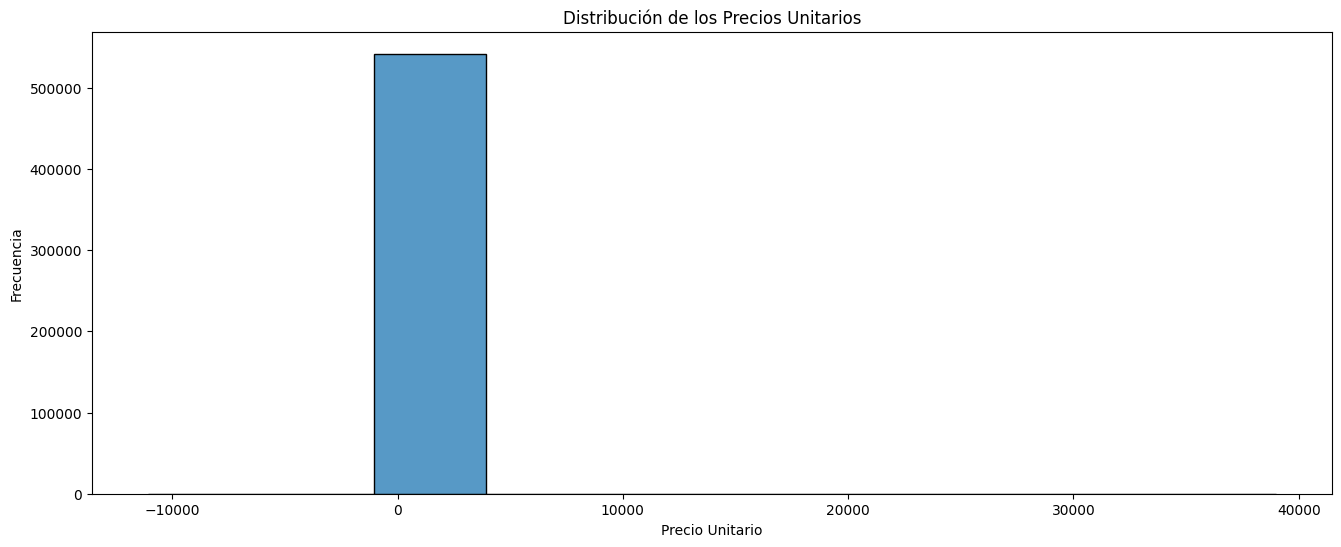

In [ ]:
# Distribución de precios unitarios
plt.figure(figsize=(16, 6))
sns.histplot(df['UNIT_PRICE'], bins=10)
plt.title('Distribución de los Precios Unitarios')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.show()

Ya que tenemos una alta concentración de precios unitarios muy cerca de cero que están afectando nuestra visualización, vamos a ajustar el histograma para excluir los valores extremos y visualizar mejor los datos comunes.

## Filtracion de rangos en UNIT_PRICE

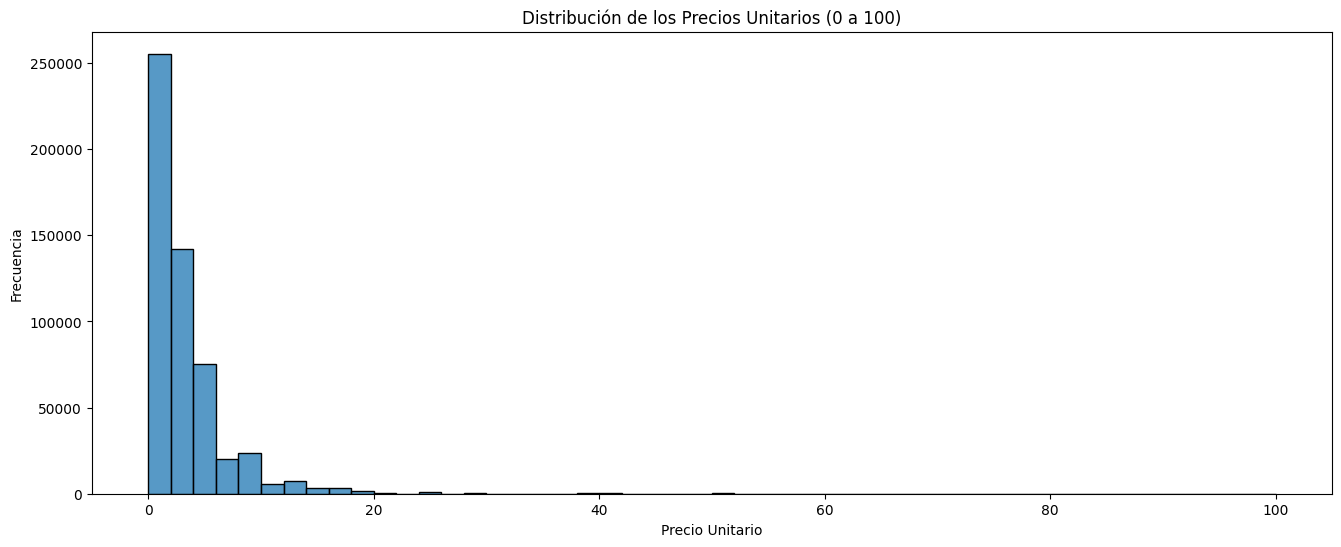

In [ ]:
# Filtrar los datos para precios unitarios en un rango razonable
df_filtered = df[(df['UNIT_PRICE'] >= 0) & (df['UNIT_PRICE'] <= 100)]

# Distribución de precios unitarios dentro del rango filtrado
plt.figure(figsize=(16, 6))
sns.histplot(df_filtered['UNIT_PRICE'], bins=50)
plt.title('Distribución de los Precios Unitarios (0 a 100)')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.show()

Ya que podemos ver una mejor distribución de los precios unitarios, vamos a analizar los datos extremos para poder entender mejor su impacto en los datos.

## Análisis de valores extremos en UNIT_PRICE

In [ ]:
# Valores extremos en UNIT_PRICE
extreme_prices = df[(df['UNIT_PRICE'] > 1000) | (df['UNIT_PRICE'] < 0)]

print("Valores extremos en UNIT_PRICE:")
print(extreme_prices.describe())

# Número de valores extremos
num_extreme_prices = len(extreme_prices)
print(f"Número de valores extremos: {num_extreme_prices}")

Valores extremos en UNIT_PRICE:
         QUANTITY                   INVOICE_DATE    UNIT_PRICE   CUSTOMER_ID
count  122.000000                            122    122.000000     46.000000
mean    -0.090164  2020-07-14 08:44:05.901639168   3759.296393  14173.804348
min     -2.000000            2019-12-07 15:04:00 -11062.060000  12503.000000
25%     -1.000000            2020-04-04 13:08:15   1273.495000  12744.000000
50%     -1.000000            2020-08-05 12:41:30   2043.085000  14096.000000
75%      1.000000            2020-10-30 13:37:15   5062.682500  15301.250000
max      1.000000            2020-12-09 10:26:00  38970.000000  18102.000000
std      1.012354                            NaN   5174.857618   1744.051676
Número de valores extremos: 122


In [ ]:
# Valores negativos en UNIT_PRICE
negative_unit_price = df[df['UNIT_PRICE'] < 0]

print("Valores negativos en UNIT_PRICE:")
print(negative_unit_price.describe())

# Número de valores negativos
num_negative_prices = len(negative_unit_price)
print(f"Número de valores negativos: {num_negative_prices}")

Valores negativos en UNIT_PRICE:
       QUANTITY         INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID
count       2.0                    2        2.00          0.0
mean        1.0  2020-08-12 14:51:30   -11062.06          NaN
min         1.0  2020-08-12 14:51:00   -11062.06          NaN
25%         1.0  2020-08-12 14:51:15   -11062.06          NaN
50%         1.0  2020-08-12 14:51:30   -11062.06          NaN
75%         1.0  2020-08-12 14:51:45   -11062.06          NaN
max         1.0  2020-08-12 14:52:00   -11062.06          NaN
std         0.0                  NaN        0.00          NaN
Número de valores negativos: 2


In [ ]:
# Análisis detallado de los valores extremos
extreme_prices.head(20)  # Mostrar los primeros 20 registros para revisión

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2019-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2019-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2019-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2019-12-07 15:41:00,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2019-12-07 15:49:00,13541.33,NaN,United Kingdom
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2019-12-07 15:51:00,6706.71,NaN,United Kingdom
28994,C538682,M,Manual,-1,2019-12-13 17:14:00,1130.90,NaN,United Kingdom
41448,539856,M,Manual,1,2019-12-22 14:41:00,1298.40,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2020-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2020-01-05 09:57:00,16453.71,NaN,United Kingdom


Al ver esta tabla podemos darnos cuenta que estos valores negativos, no representan ventas tipicas, sino mas bien cargos adicionales o ajustes financieros.

Vamos a verificar mas detalles de estas descripciones para tomar decisiones informadas sobre como manejarlas.

In [ ]:
# Conteo de las descripciones en los valores extremos
extreme_descriptions = extreme_prices['DESCRIPTION'].value_counts()
print(extreme_descriptions)


DESCRIPTION
Manual             54
AMAZON FEE         31
DOTCOM POSTAGE     28
Adjust bad debt     3
POSTAGE             2
CRUK Commission     2
Bank Charges        1
Discount            1
Name: count, dtype: int64


Dado la naturaleza de nuestro proyecto en la cual buscamos segmentar a los clientes, una venta sin un CUSTOMER_ID no nos sirve para entrenar un modelo, además los cargos negativos no son ventas típicas y no deberían utilizarse para nuestros análisis

## Distribucion de QUANTITY

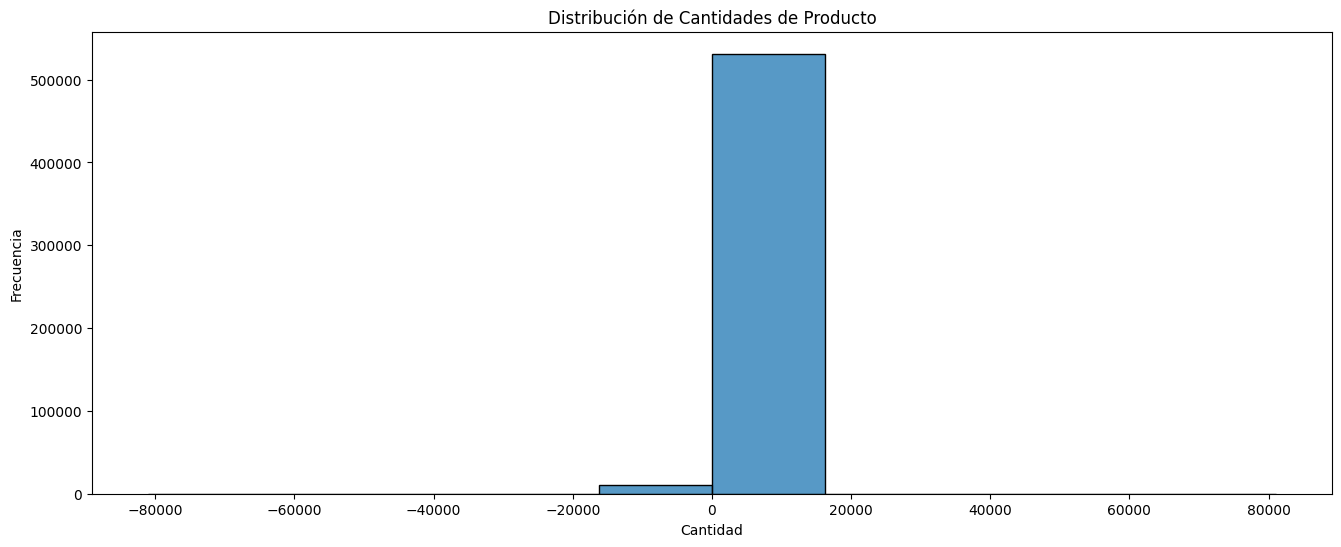

In [ ]:
# Distribución de cantidades de producto
plt.figure(figsize=(16, 6))
sns.histplot(df['QUANTITY'], bins=10)
plt.title('Distribución de Cantidades de Producto')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

Vamos a ver que son esos valores nengativos

In [ ]:
# Filtrar registros con QUANTITY negativa
negative_quantities = df[df['QUANTITY'] < 0]

# Mostrar una muestra de estos registros
print("Valores negativos en QUANTITY:")
print()
print(negative_quantities.head(20))
print()
 # Contar el número de registros con QUANTITY negativa
print("Número de registros con QUANTITY negativa:")
print(negative_quantities.count())


Valores negativos en QUANTITY:

     INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
141     C536379          D                             Discount        -1   
154     C536383     35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
235     C536391      22556       PLASTERS IN TIN CIRCUS PARADE        -12   
236     C536391      21984     PACK OF 12 PINK PAISLEY TISSUES        -24   
237     C536391      21983     PACK OF 12 BLUE PAISLEY TISSUES        -24   
238     C536391      21980    PACK OF 12 RED RETROSPOT TISSUES        -24   
239     C536391      21484          CHICK GREY HOT WATER BOTTLE       -12   
240     C536391      22557     PLASTERS IN TIN VINTAGE PAISLEY        -12   
241     C536391      22553               PLASTERS IN TIN SKULLS       -24   
939     C536506      22960             JAM MAKING SET WITH JARS        -6   
1441    C536543      22632            HAND WARMER RED RETROSPOT        -1   
1442    C536543      22355            CHARLO

Podemos ver distintos registros con una cantidad negativa, esto podría representar alguna devolución, ajuste de inventario o error.

## Análisis precio cero

In [ ]:
# Filtrar registros con UNIT_PRICE igual a 0
df_zero = df[df['UNIT_PRICE'] == 0]

# Contar el número de registros con UNIT_PRICE igual a 0
print("Número de registros con UNIT_PRICE igual a 0:")
print(df_zero.count())
print("")
# Recuento de los valores únicos en DESCRIPTION en los registros filtrados
description_counts = df_zero['DESCRIPTION'].value_counts(dropna=False)
print("Recuento de valores únicos en DESCRIPTION (incluyendo NaN):")
print(description_counts)

Número de registros con UNIT_PRICE igual a 0:
INVOICE_NO      2515
STOCK_CODE      2515
DESCRIPTION     1061
QUANTITY        2515
INVOICE_DATE    2515
UNIT_PRICE      2515
CUSTOMER_ID       40
REGION          2515
dtype: int64

Recuento de valores únicos en DESCRIPTION (incluyendo NaN):
DESCRIPTION
NaN                                 1454
check                                159
?                                     47
damages                               45
damaged                               43
                                    ... 
HEART GARLAND RUSTIC PADDED            1
CHICK GREY HOT WATER BOTTLE            1
mystery! Only ever imported 1800       1
POSSIBLE DAMAGES OR LOST?              1
lost                                   1
Name: count, Length: 377, dtype: int64


In [ ]:
# Filtrar registros con UNIT_PRICE igual a 0 y DESCRIPTION en blanco (NaN)
df_zero_nan = df[(df['UNIT_PRICE'] == 0) & (df['DESCRIPTION'].isnull())]

# Mostrar una muestra de estos registros
print("\nRegistros con UNIT_PRICE igual a 0 y DESCRIPTION en blanco (NaN):")
print()
print(df_zero_nan.head(20))
print()

# Contar el número de registros con UNIT_PRICE igual a 0 y DESCRIPTION en blanco (NaN)
print("Número de registros con UNIT_PRICE igual a 0 y DESCRIPTION en blanco (NaN):")
print(df_zero_nan.shape[0])  # Usamos shape[0] para contar el número de filas
print()
print(f"Porcentaje de registros con UNIT_PRICE igual a 0 y DESCRIPTION en blanco (NaN): {(len(df_zero_nan) / len(df)) * 100:.2f}%")


Registros con UNIT_PRICE igual a 0 y DESCRIPTION en blanco (NaN):

     INVOICE_NO STOCK_CODE DESCRIPTION  QUANTITY        INVOICE_DATE  \
622      536414      22139         NaN        56 2019-12-01 11:52:00   
1970     536545      21134         NaN         1 2019-12-01 14:32:00   
1971     536546      22145         NaN         1 2019-12-01 14:33:00   
1972     536547      37509         NaN         1 2019-12-01 14:33:00   
1987     536549     85226A         NaN         1 2019-12-01 14:34:00   
1988     536550      85044         NaN         1 2019-12-01 14:34:00   
2024     536552      20950         NaN         1 2019-12-01 14:34:00   
2025     536553      37461         NaN         3 2019-12-01 14:35:00   
2026     536554      84670         NaN        23 2019-12-01 14:35:00   
2406     536589      21777         NaN       -10 2019-12-01 16:50:00   
4347     536764     84952C         NaN       -38 2019-12-02 14:42:00   
4348     536765     84952C         NaN        19 2019-12-02 14:43:00

Para los registros donde el precio unitario (UNIT_PRICE) es igual a cero, el concepto en la descripción (DESCRIPTION) que más se presenta son los valores NaN, los cuales constituyen el 0.27% del total de datos. Estos registros también tienen únicamente valores NaN en la columna de identificación de cliente (CUSTOMER_ID). Por lo tanto, se recomienda no considerar estos registros y proceder con su eliminación.

## Busqueda de duplicados

In [ ]:
# Revisar registros duplicados en el dataset limpio
duplicated_records = df.duplicated()

# Contar el número de registros duplicados
num_duplicated_records = duplicated_records.sum()
print(f"Número de registros duplicados: {num_duplicated_records}")

perc_duplicated_records = (duplicated_records.sum() / len(df)) * 100
print(f"Porcentaje de registros duplicados: {perc_duplicated_records:.2f}%")

Número de registros duplicados: 5268
Porcentaje de registros duplicados: 0.97%


Podemos ver 5.269 filas que se duplican, que representan solo el 0.97% de los datos, en este caso lo que utilizaremos sera eliminar estas filas.

## Visualizacion de Datos

### Grafico descripciones más comunes


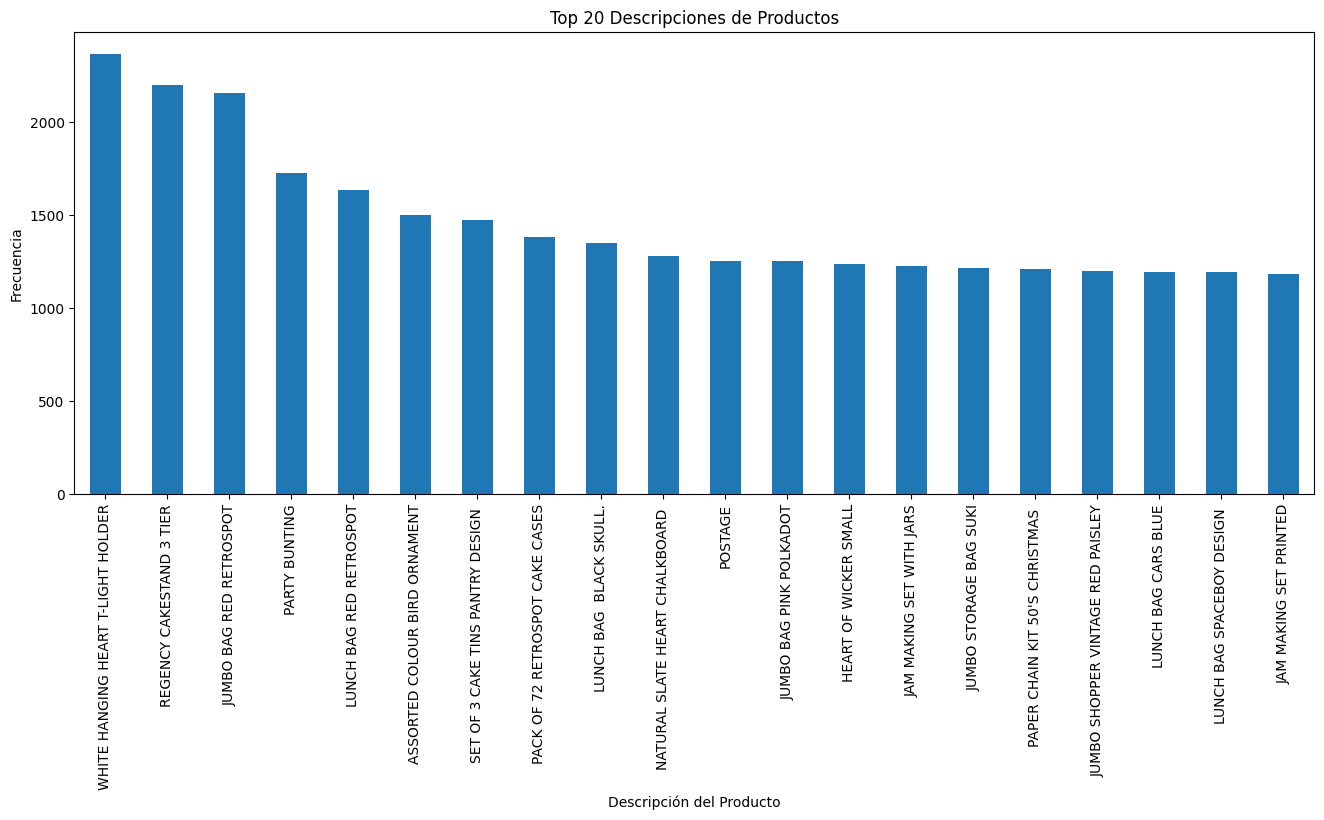

In [ ]:
plt.figure(figsize=(16, 6))
df['DESCRIPTION'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Descripciones de Productos')
plt.xlabel('Descripción del Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# dataframe a formato Json
df['DESCRIPTION'].value_counts().head(20).to_json(orient = 'columns')

'{"WHITE HANGING HEART T-LIGHT HOLDER":2369,"REGENCY CAKESTAND 3 TIER":2200,"JUMBO BAG RED RETROSPOT":2159,"PARTY BUNTING":1727,"LUNCH BAG RED RETROSPOT":1638,"ASSORTED COLOUR BIRD ORNAMENT":1501,"SET OF 3 CAKE TINS PANTRY DESIGN ":1473,"PACK OF 72 RETROSPOT CAKE CASES":1385,"LUNCH BAG  BLACK SKULL.":1350,"NATURAL SLATE HEART CHALKBOARD ":1280,"POSTAGE":1252,"JUMBO BAG PINK POLKADOT":1251,"HEART OF WICKER SMALL":1237,"JAM MAKING SET WITH JARS":1229,"JUMBO STORAGE BAG SUKI":1214,"PAPER CHAIN KIT 50\'S CHRISTMAS ":1210,"JUMBO SHOPPER VINTAGE RED PAISLEY":1202,"LUNCH BAG CARS BLUE":1197,"LUNCH BAG SPACEBOY DESIGN ":1192,"JAM MAKING SET PRINTED":1182}'

# Limpieza de Data Set

Ya que decidimos que valores nos sirven y cuales no, procederemos a hacer la limpieza de el Data Set para poder hacer un AED que nos de mayor información con datos que estaremos trabajando.

## Eliminacion de duplicados

In [ ]:
# Eliminar registros duplicados, dataFrame incluye clientes no registrados
df_clean_allC = df.drop_duplicates()

# Verificar que se hayan eliminado los duplicados
num_duplicated_records_after = df_clean_allC.duplicated().sum()
print(f"Número de registros duplicados después de eliminar: {num_duplicated_records_after}")


Número de registros duplicados después de eliminar: 0


## Eliminacion de Valores Nulos

Primero eliminaremos los registros con CUSTOMER_ID Nulo

In [ ]:
# Eliminar registros nulos en CUSTOMER_ID
df_clean = df_clean_allC.dropna(subset=['CUSTOMER_ID'])

# Verificar que se hayan eliminado los valores nulos
null_records_CUSTOMERID = df_clean.isnull().sum()
print(f"Número de registros con nulos después de eliminar: {null_records_CUSTOMERID}")

Número de registros con nulos después de eliminar: INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64


In [ ]:
# CUSTOMER_ID debe ser de tipo int64 porque representa un identificador numérico sin decimales.

df_clean['CUSTOMER_ID'] = df_clean['CUSTOMER_ID'].astype(int)

# Verificar los cambios
print(df_clean.dtypes)

INVOICE_NO              object
STOCK_CODE              object
DESCRIPTION             object
QUANTITY                 int64
INVOICE_DATE    datetime64[ns]
UNIT_PRICE             float64
CUSTOMER_ID              int64
REGION                  object
dtype: object


<ipython-input-217-4dbd8c87d7d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CUSTOMER_ID'] = df_clean['CUSTOMER_ID'].astype(int)


## Eliminar valores que no son venta

In [ ]:
# Descripciones a excluir
descriptions_to_exclude = ['AMAZONFEE', 'Manual', 'DOTCOM POSTAGE', 'Adjust bad debt', 'POSTAGE', 'CRUK Commission', 'Bank Charges', 'Discount']


In [ ]:
# Excluir registros con estas descripciones - todos los clientes
df_clean_allC = df_clean_allC[~df_clean_allC['DESCRIPTION'].isin(descriptions_to_exclude)]
print(f"Número de registros después de limpiar: {len(df_clean_allC)}")
print(f"Se conserva el {round(len(df_clean_allC)/df.shape[0]*100,2)}% de los datos.")

Número de registros después de limpiar: 533980
Se conserva el 98.54% de los datos.


In [ ]:
# Excluir registros con estas descripciones - clientes registrados
df_clean = df_clean[~df_clean['DESCRIPTION'].isin(descriptions_to_exclude)]

# Verificar lps registros finales
print(f"Número de registros después de limpiar: {len(df_clean)}")
print(f"Se conserva el {round(len(df_clean)/df.shape[0]*100,2)}% de los datos.")

Número de registros después de limpiar: 399827
Se conserva el 73.78% de los datos.


# Analisis Explotario de Datos (AED) II - todos los clientes

In [ ]:
# Descripción general
df_clean_allC.describe(include='all')

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
count,533980,533980,532526,533980.000000,533980,533980.000000,399827.000000,533980
unique,25361,4064,4207,NaN,NaN,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1113,2301,2357,NaN,NaN,NaN,NaN,488847
mean,NaN,NaN,NaN,9.657828,2020-07-04 05:25:19.910071808,3.762371,15288.462187,NaN
min,NaN,NaN,NaN,-80995.000000,2019-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2020-03-28 10:52:00,1.250000,13959.000000,NaN
50%,NaN,NaN,NaN,3.000000,2020-07-19 15:23:00,2.080000,15150.000000,NaN
75%,NaN,NaN,NaN,10.000000,2020-10-18 17:05:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2020-12-09 12:50:00,17836.460000,18287.000000,NaN


In [ ]:
df_clean_allC[df_clean_allC['QUANTITY']<0].sample(5)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
155866,C550027,75049L,LARGE CIRCULAR MIRROR MOBILE,-58,2020-04-14 11:26:00,0.85,14195.0,United Kingdom
201488,554287,22700,smashed,-48,2020-05-23 14:17:00,0.00,NaN,United Kingdom
29063,C538699,35400,WOODEN BOX ADVENT CALENDAR,-4,2019-12-14 10:23:00,7.95,16422.0,United Kingdom
504698,C578991,35961,FOLKART ZINC HEART CHRISTMAS DEC,-1,2020-11-27 15:31:00,0.85,15555.0,United Kingdom
27993,C538595,82482,WOODEN PICTURE FRAME WHITE FINISH,-2,2019-12-13 12:03:00,2.55,15555.0,United Kingdom


In [ ]:
df_clean_allC[df_clean_allC['INVOICE_NO'].str.startswith('C')].describe()

,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID
count,8762.000000,8762,8762.000000,8507.000000
mean,-30.827551,2020-06-25 16:59:08.217301760,31.582739,14994.950159
min,-80995.000000,2019-12-01 09:49:00,0.030000,12346.000000
25%,-6.000000,2020-03-21 11:19:00,1.450000,13523.000000
50%,-2.000000,2020-07-07 17:22:00,2.750000,14901.000000
75%,-1.000000,2020-10-06 20:36:00,4.950000,16393.000000
max,-1.000000,2020-12-09 11:58:00,17836.460000,18282.000000
std,1179.442664,NaN,516.563188,1705.785987


In [ ]:
# transacciones de clientes con cancelaciones
df_clean_allC_C = df_clean_allC[df_clean_allC['INVOICE_NO'].str.startswith('C')]
print("Porcentaje de productos con cantidad negativa ",round(df_clean_allC_C.shape[0]/df_clean_allC.shape[0]*100, 2),"")

Porcentaje de productos con cantidad negativa  1.64 


Se determina que todos los productos cuyo `INVOICE_NO` empieza con `C` es porque la transaccion fue cancelada y los productos devueltos, cosa que provoca las cantidades negativas.

In [ ]:
# transacciones de clientes sin contar cancelaciones
df_clean_allC_WoC = df_clean_allC[~df_clean_allC['INVOICE_NO'].str.startswith('C')]

<Axes: xlabel='INVOICE_DATE'>

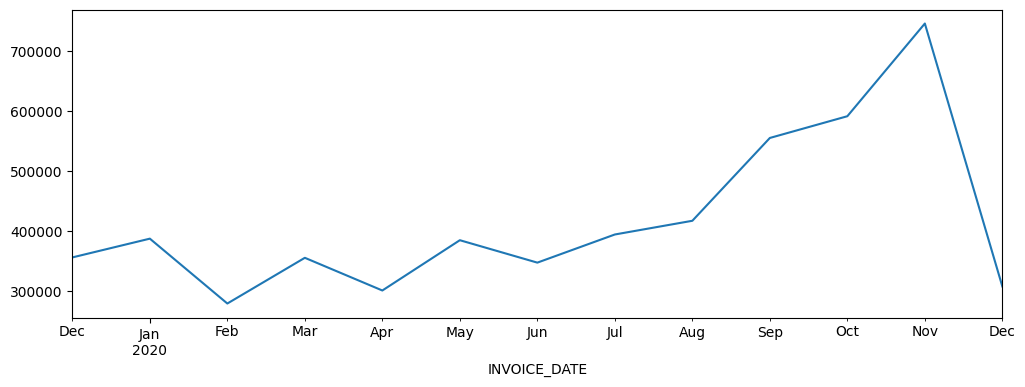

In [ ]:
# Cantidad de productos comprados a traves del tiempo
df_clean_allC_WoC.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().plot(figsize=(12,4))

In [ ]:
# grafica a formato Json
df_clean_allC_WoC.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().to_json(orient = 'columns')

'{"1577750400000":356571,"1580428800000":387771,"1582934400000":279940,"1585612800000":355940,"1588204800000":301593,"1590883200000":385185,"1593475200000":347911,"1596153600000":394688,"1598832000000":417481,"1601424000000":555145,"1604102400000":591284,"1606694400000":745372,"1609372800000":308317}'

In [ ]:
# hacer número de cancelaciones cantidad positiva
df_clean_allC_C['QUANTITY'] = df_clean_allC_C['QUANTITY']*(-1)

<ipython-input-228-f6a60b163e1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_allC_C['QUANTITY'] = df_clean_allC_C['QUANTITY']*(-1)


<Axes: xlabel='INVOICE_DATE'>

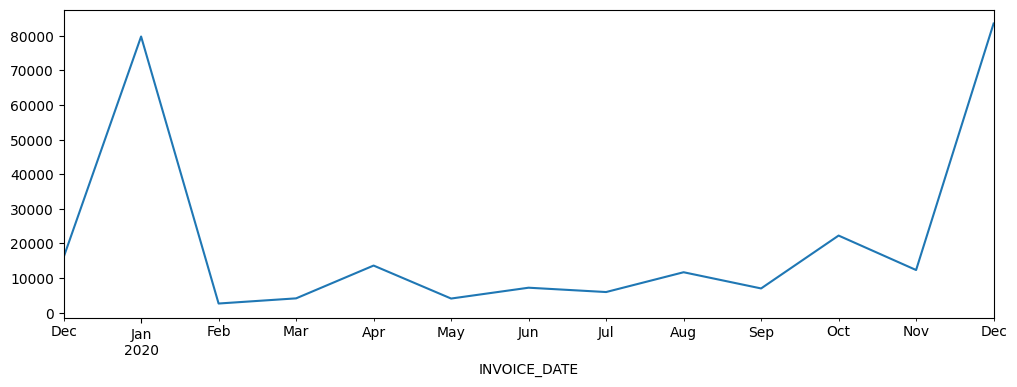

In [ ]:
# Cantidad de productos devueltos/cancelados a traves del tiempo
df_clean_allC_C.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().plot(figsize=(12,4))

In [ ]:
# grafica a formato Json
df_clean_allC_C.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().to_json(orient = 'columns')

'{"1577750400000":15985,"1580428800000":79786,"1582934400000":2630,"1585612800000":4123,"1588204800000":13599,"1590883200000":4069,"1593475200000":7199,"1596153600000":5947,"1598832000000":11670,"1601424000000":6987,"1604102400000":22265,"1606694400000":12311,"1609372800000":83540}'

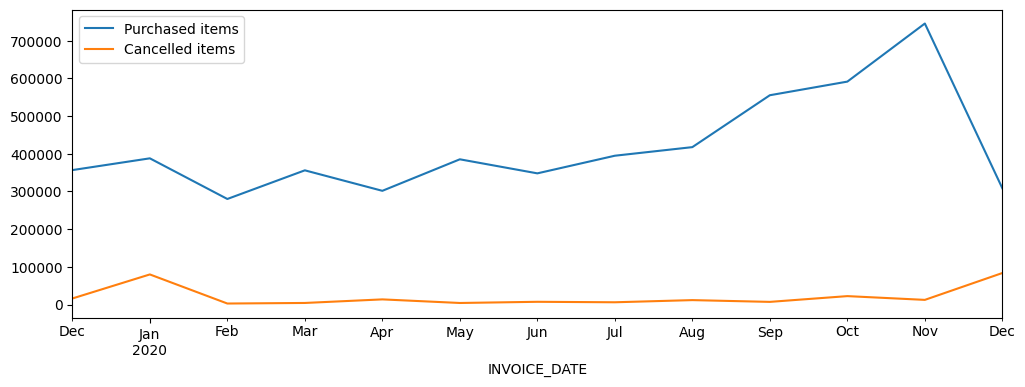

In [ ]:
ax = df_clean_allC_WoC.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().plot()
df_clean_allC_C.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().plot(ax=ax, figsize=(12,4))
ax.legend(["Purchased items", "Cancelled items"]);
plt.show()

In [ ]:
# grafica a formato Json
df_clean_allC_WoC.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().to_json(orient = 'columns')

'{"1577750400000":356571,"1580428800000":387771,"1582934400000":279940,"1585612800000":355940,"1588204800000":301593,"1590883200000":385185,"1593475200000":347911,"1596153600000":394688,"1598832000000":417481,"1601424000000":555145,"1604102400000":591284,"1606694400000":745372,"1609372800000":308317}'

# Analisis Explotario de Datos (AED) II - clientes registrados

Ahora con los datos limpios vamos a explorarlos un poco mas para entenderlos y ver si necesitan mas limpieza



## Descripcion de los datos II

In [ ]:
df_clean.describe(include='all')

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
count,399827,399827,399827,399827.000000,399827,399827.000000,399827.000000,399827
unique,21791,3678,3881,NaN,NaN,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,541,2065,2058,NaN,NaN,NaN,NaN,356144
mean,NaN,NaN,NaN,12.225505,2020-07-10 08:30:52.255150592,2.923256,15288.462187,NaN
min,NaN,NaN,NaN,-80995.000000,2019-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2020-04-06 15:07:00,1.250000,13959.000000,NaN
50%,NaN,NaN,NaN,5.000000,2020-07-29 15:51:00,1.950000,15150.000000,NaN
75%,NaN,NaN,NaN,12.000000,2020-10-20 12:03:00,3.750000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2020-12-09 12:50:00,649.500000,18287.000000,NaN


## Visualizaciones de los Datos

### Grafico de Cantidades de Productos

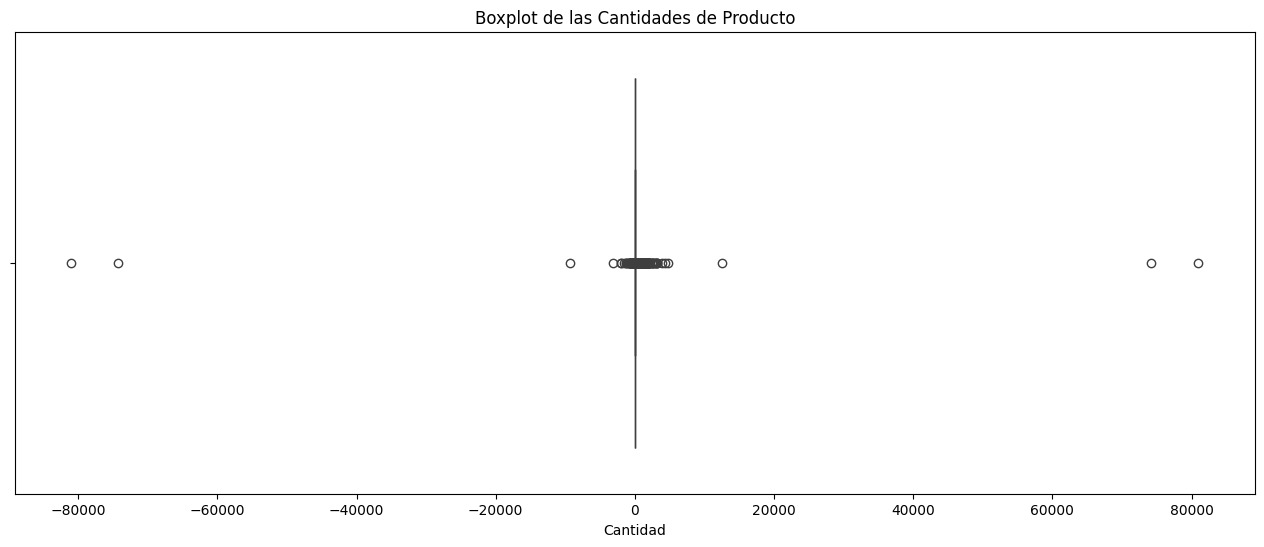

In [ ]:
# Crear un boxplot para visualizar la distribución de la cantidad de productos
plt.figure(figsize=(16, 6))
sns.boxplot(x=df_clean['QUANTITY'])
plt.title('Boxplot de las Cantidades de Producto')
plt.xlabel('Cantidad')
plt.show()

### Grafico de precios unitarios

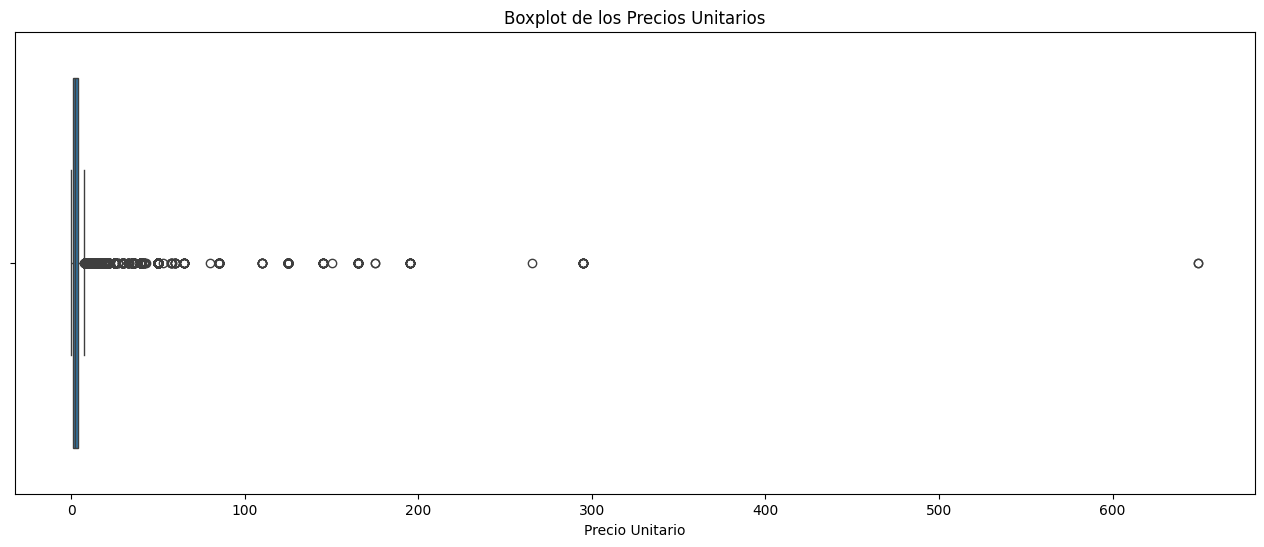

In [ ]:
# Crear un boxplot para visualizar la distribución de precios unitarios
plt.figure(figsize=(16, 6))
sns.boxplot(x=df_clean['UNIT_PRICE'])
plt.title('Boxplot de los Precios Unitarios')
plt.xlabel('Precio Unitario')
plt.show()


In [ ]:
#Transacciones con precio de 0
print(f"Número de registros con precio unitario de 0: {df_clean[df_clean['UNIT_PRICE']==0].shape[0]} transacciones")

Número de registros con precio unitario de 0: 34 transacciones


In [ ]:
df_clean[df_clean['UNIT_PRICE']>500]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2020-06-10 15:28:00,649.5,15098,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2020-06-10 15:33:00,649.5,15098,United Kingdom


### Grafico de Dispersion entre QUANTITY y UNIT_PRICE

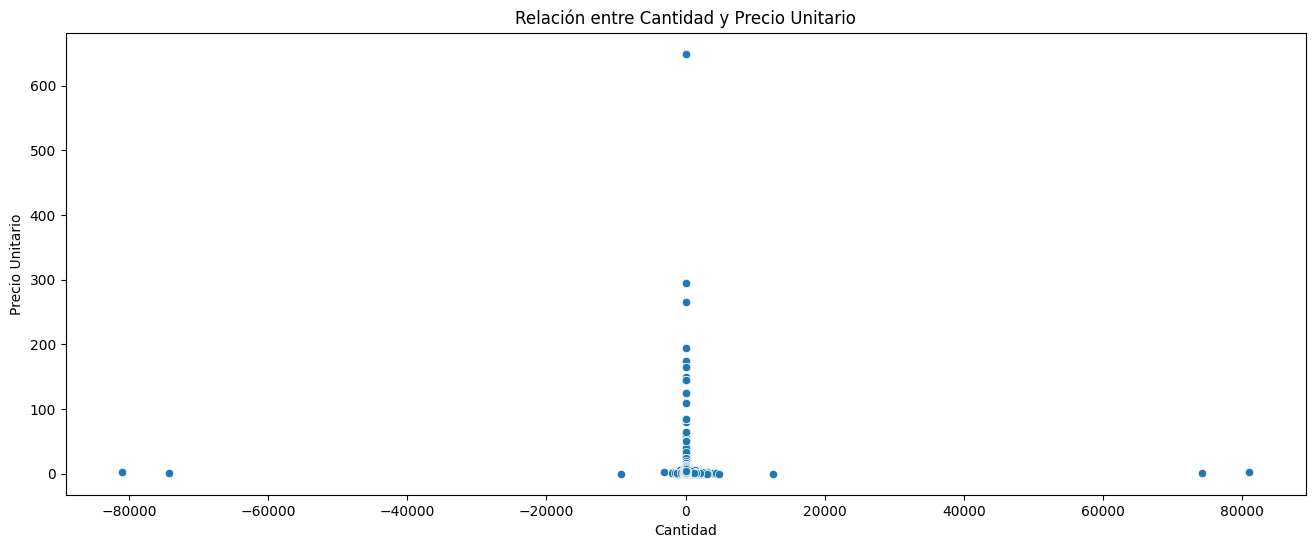

In [ ]:
# Gráfico de dispersión para visualizar la relación entre QUANTITY y UNIT_PRICE
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_clean, x='QUANTITY', y='UNIT_PRICE')
plt.title('Relación entre Cantidad y Precio Unitario')
plt.xlabel('Cantidad')
plt.ylabel('Precio Unitario')
plt.show()


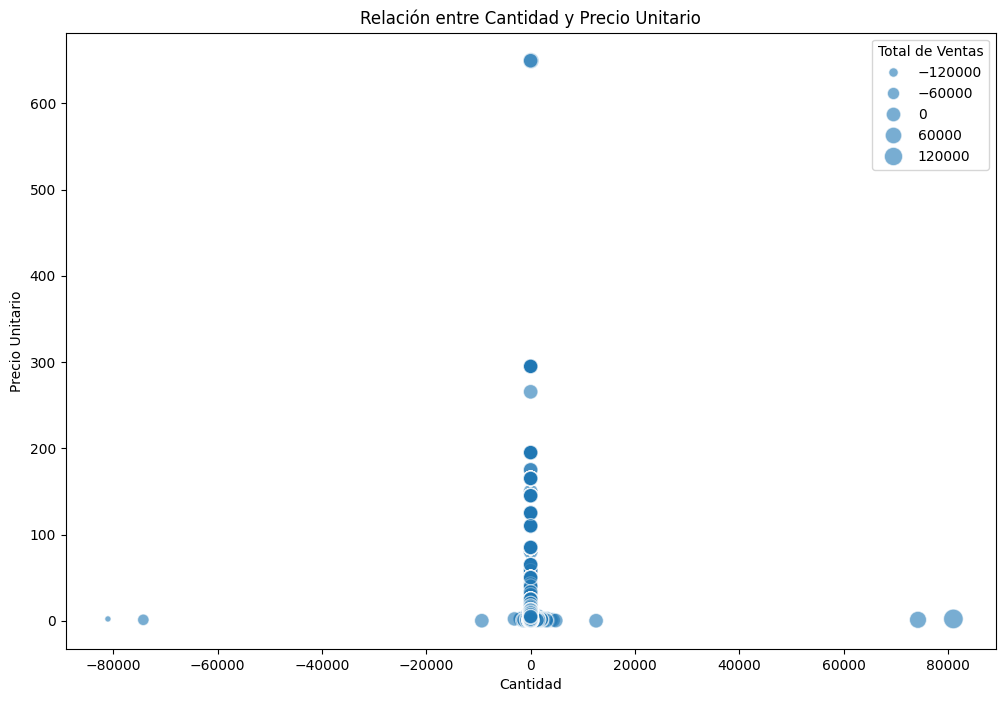

In [ ]:
#PROPUESTA DE GRÁFICO DE DISPERSIÓN CONSIDERANDO EL CALCULO TOTAL DE VENTAS

# copia del DataFrame original solo para hacer este gráfico
df_plot = df_clean.copy()

# calcula el total de ventas como el producto de QUANTITY y UNIT_PRICE en el nuevo DataFrame
df_plot['TOTAL_SALES'] = df_plot['QUANTITY'] * df_plot['UNIT_PRICE']

# Gráfico
plt.figure(figsize=(12, 8))

# Scatterplot con tamaño de punto variable según el total de ventas del nuevo DataFrame
sns.scatterplot(data=df_plot, x='QUANTITY', y='UNIT_PRICE', size='TOTAL_SALES', sizes=(20, 200), alpha=0.6)
plt.title('Relación entre Cantidad y Precio Unitario')
plt.xlabel('Cantidad')
plt.ylabel('Precio Unitario')
plt.legend(title='Total de Ventas')

plt.show()

### Grafico descripciones mas comunes

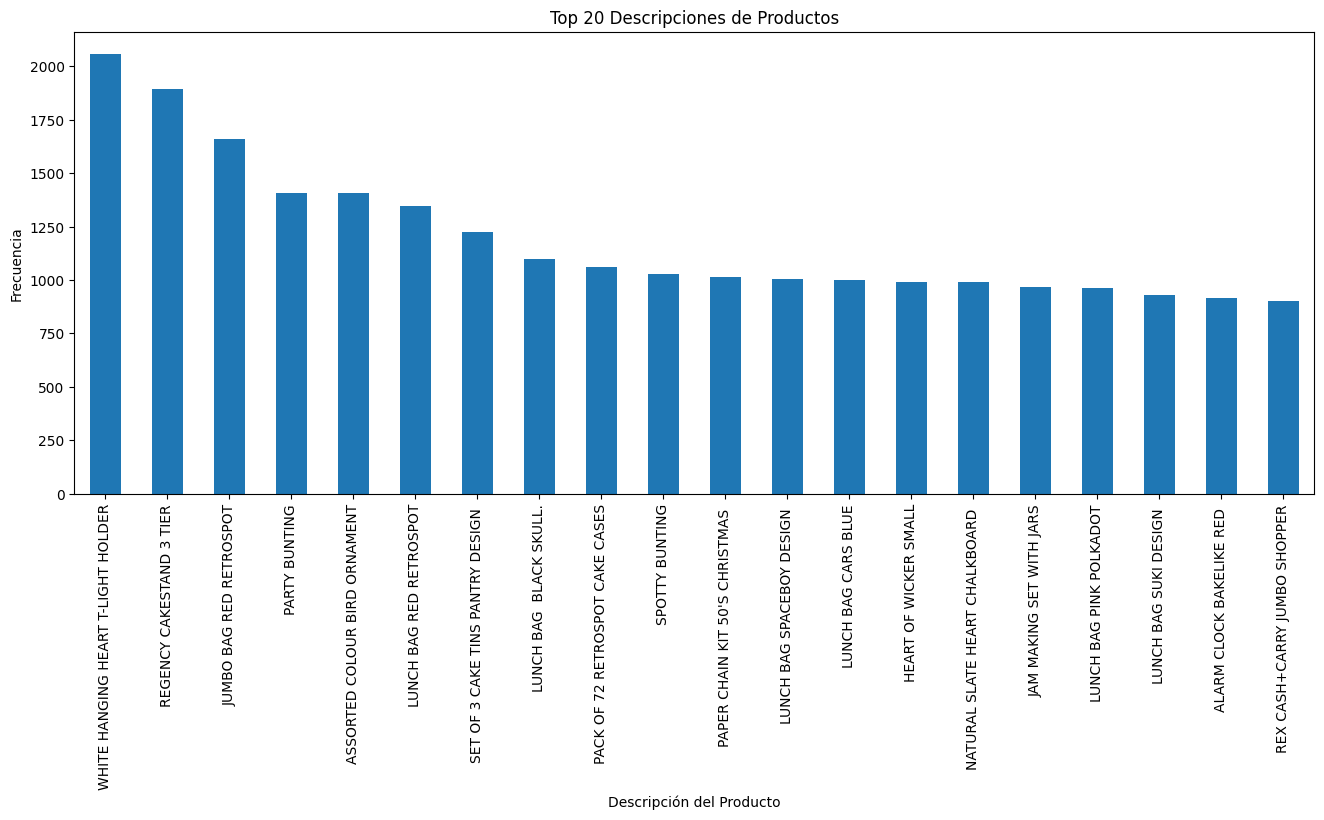

In [ ]:
plt.figure(figsize=(16, 6))
df_clean['DESCRIPTION'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Descripciones de Productos')
plt.xlabel('Descripción del Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

Veamos el listado de descripciones

In [ ]:
df_clean['DESCRIPTION'].value_counts().head(10)

DESCRIPTION
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
SPOTTY BUNTING                        1026
Name: count, dtype: int64

In [ ]:
# top 10 paises
df_clean['REGION'].value_counts().head(10)

REGION
United Kingdom    356144
Germany             9081
France              8154
EIRE                7469
Spain               2463
Netherlands         2330
Belgium             1971
Switzerland         1844
Portugal            1427
Australia           1256
Name: count, dtype: int64

### Gráfico Distribucion por Region

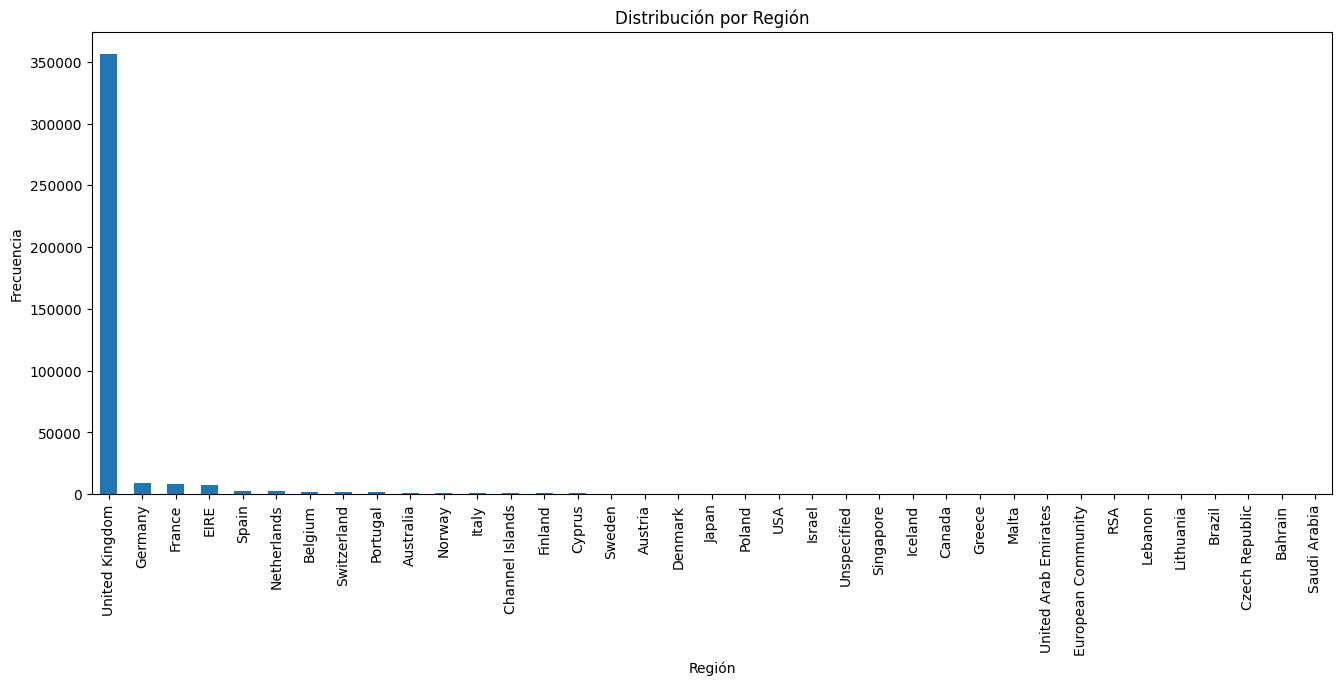

In [ ]:
plt.figure(figsize=(16, 6))
df_clean['REGION'].value_counts().plot(kind='bar')
plt.title('Distribución por Región')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

Podemos ver que la mayoria de los registros vienen de UK

### Gráfico Ventas totales por región

<ipython-input-244-d5794454d276>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ventas_totales= sns.barplot(


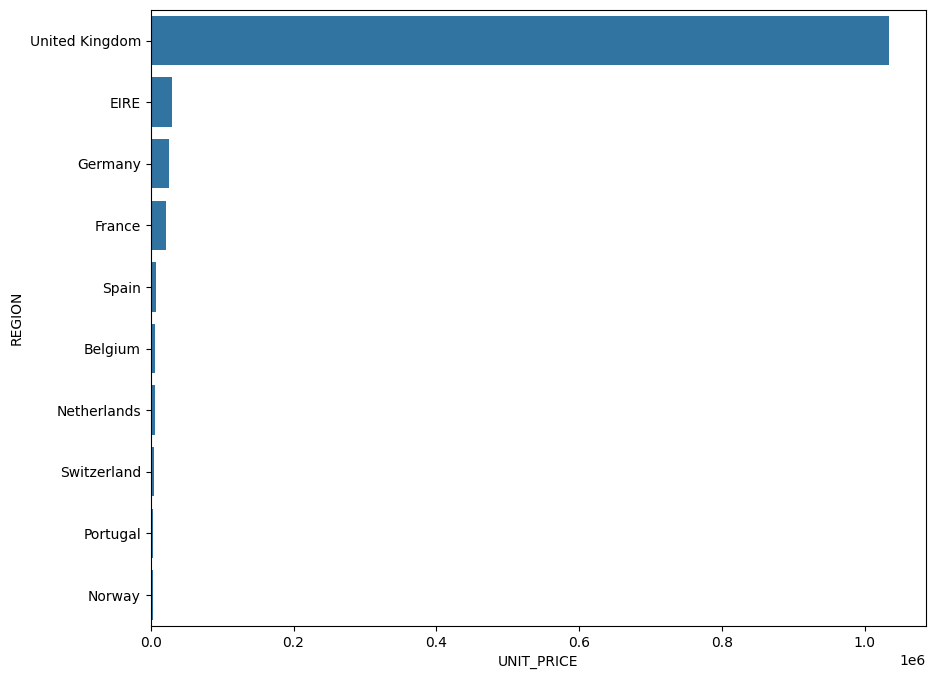

In [ ]:
ventas_pais= df_clean.pivot_table(index="REGION", values="UNIT_PRICE", aggfunc=sum)
ventas_pais_ordenado = ventas_pais.sort_values(by='UNIT_PRICE', ascending=False)
top_10_paises = ventas_pais_ordenado.head(10)

ventas_totales= sns.barplot(
    x="UNIT_PRICE",
    y="REGION",
    data=top_10_paises,
    estimator=sum,
    ci=None);
plt.show()

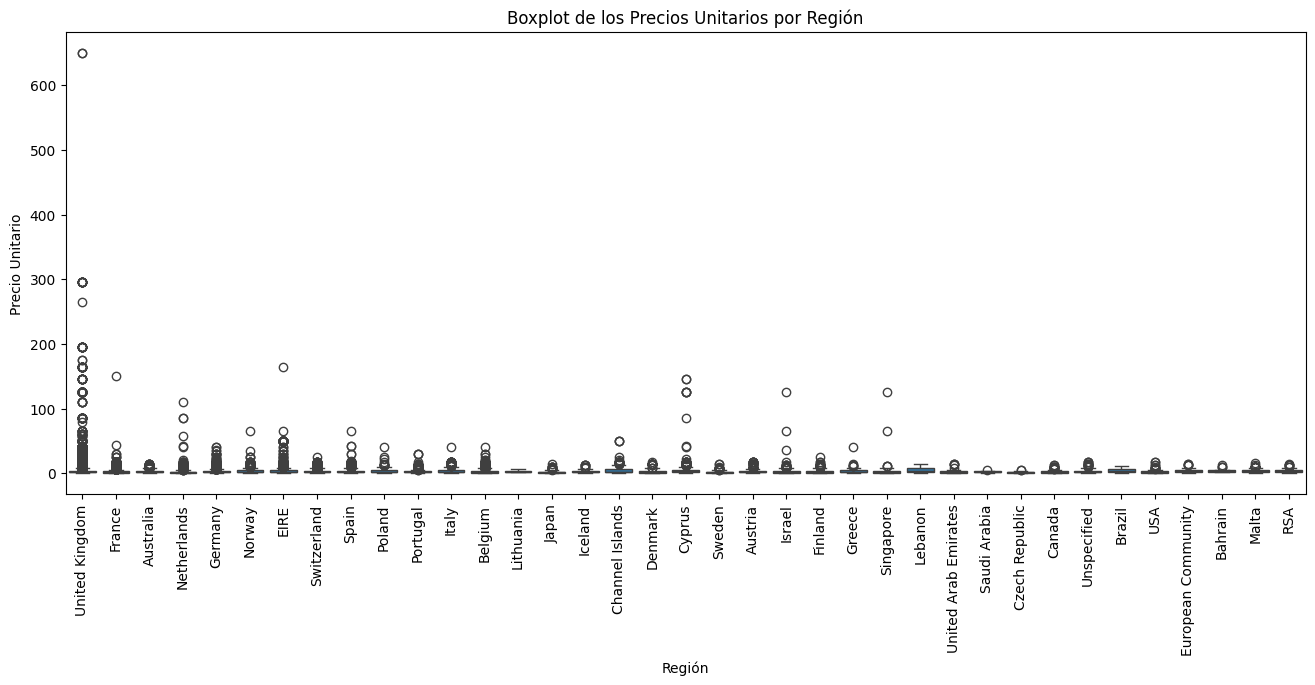

In [ ]:
# Crear un boxplot para visualizar la distribución de precios unitarios por región
plt.figure(figsize=(16, 6))
sns.boxplot(x='REGION', y='UNIT_PRICE', data=df_clean)
plt.title('Boxplot de los Precios Unitarios por Región')
plt.xlabel('Región')
plt.ylabel('Precio Unitario')
plt.xticks(rotation=90)
plt.show()


# Analisis de segmentación de población

## Comportamiento en el tiempo de los usuarios segun su ubicación

In [ ]:
# Sacar la fecha de inicio de compras de un usuario
df_first_date = df.groupby(['CUSTOMER_ID']).agg({'INVOICE_DATE':'min'}).reset_index()
df_first_date.columns = ['CUSTOMER_ID','FIRST_DATE']

# Unir los primeros registros y la tabla de registros
df_invoice_frecuence = df.merge(df_first_date, on = 'CUSTOMER_ID')
df_invoice_frecuence['INVOICE_DATE'] = pd.to_datetime(df_invoice_frecuence['INVOICE_DATE'])
df_invoice_frecuence['FIRST_DATE'] = pd.to_datetime(df_invoice_frecuence['FIRST_DATE'])

# Realizar una diferencia del inicio de una actividad de un usuario repecto a su primera actividad en la plataforma, verificando la frecuencia en que regresan
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
df_invoice_frecuence['COHORT_FRECUENCE'] = df_invoice_frecuence.apply(lambda row: diff_month(row['INVOICE_DATE'], row['FIRST_DATE']), axis=1)
df_invoice_frecuence['COHORT_FRECUENCE'] = df_invoice_frecuence['COHORT_FRECUENCE'].astype('int').round()

# Formatear la fecha de inicio de compras
df_invoice_frecuence['FIRST_DATE'] = df_invoice_frecuence['FIRST_DATE'].dt.month

# Tabla pivote contrastando la feccha de inicio y el desarrollo en el tiempo
cohort_invoice = df_invoice_frecuence.pivot_table(index = 'FIRST_DATE',
                                                  columns ='COHORT_FRECUENCE',
                                                  values = 'CUSTOMER_ID',
                                                  aggfunc = 'nunique').reset_index()

#Orden de los meses
order = [12,1,2,3,4,5,6,7,8,9,10,11]

# Ordenar el DataFrame por la columna 'FIRST_DATE'
cohort_invoice['FIRST_DATE'] = pd.Categorical(cohort_invoice['FIRST_DATE'], categories=order, ordered=True)
cohort_invoice = cohort_invoice.sort_values(by='FIRST_DATE')
cohort_invoice = cohort_invoice[[0,1,2,3,4,5,6,7,8,9,10,11,12]]


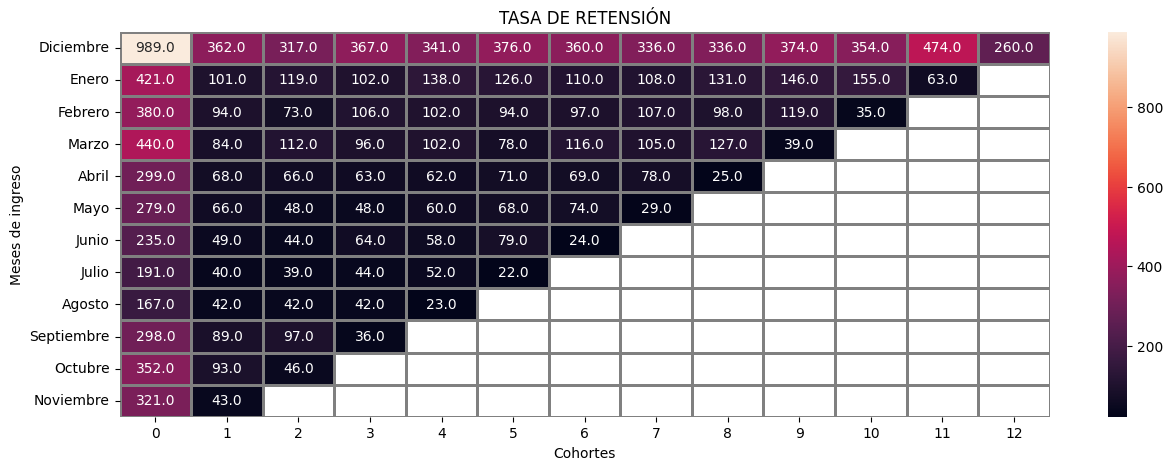

In [ ]:
# Mapa de calor para cohorte
plt.figure(figsize=(15, 5))
plt.title('TASA DE RETENSIÓN')
heatmap= sns.heatmap(cohort_invoice,
                     annot=True,
                     fmt='1',
                     linewidths=1,
                     linecolor='gray')

heatmap.set_xlabel('Cohortes')
heatmap.set_ylabel('Meses de ingreso')
index = ['Diciembre','Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

Se evidencia como en los diferentes grupos se reduce del primer al segundo en una cuarta parte aproximadamentes, los registros de compras, llegando al mes de agostos con el minimo de usuarios que inician a comprar. Sin embargo, en dicientre se triplican los usuarios de inician a comprar llegando a maximos registrados.

### Comportamiento en el tiempo de los usuarios en Reino Unido

In [ ]:
# Sacar la fecha de inicio de compras de un usuario de reino unido
df_first_date_uk = df[df['REGION']=='United Kingdom'].groupby(['CUSTOMER_ID']).agg({'INVOICE_DATE':'min'}).reset_index()
df_first_date_uk.columns = ['CUSTOMER_ID','FIRST_DATE']

# Unir los primeros registros y la tabla de registros
df_invoice_frecuence_uk = df.merge(df_first_date_uk, on = 'CUSTOMER_ID')
df_invoice_frecuence_uk['INVOICE_DATE'] = pd.to_datetime(df_invoice_frecuence_uk['INVOICE_DATE'])
df_invoice_frecuence_uk['FIRST_DATE'] = pd.to_datetime(df_invoice_frecuence_uk['FIRST_DATE'])

# Realizar una diferencia del inicio de una actividad de un usuario repecto a su primera actividad en la plataforma, verificando la frecuencia en que regresan
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
df_invoice_frecuence_uk['COHORT_FRECUENCE'] = df_invoice_frecuence_uk.apply(lambda row: diff_month(row['INVOICE_DATE'], row['FIRST_DATE']), axis=1)
df_invoice_frecuence_uk['COHORT_FRECUENCE'] = df_invoice_frecuence_uk['COHORT_FRECUENCE'].astype('int').round()

# Formatear la fecha de inicio de compras
df_invoice_frecuence_uk['FIRST_DATE'] = df_invoice_frecuence_uk['FIRST_DATE'].dt.month

# Tabla pivote contrastando la fecha de inicio y el desarrollo en el tiempo
cohort_invoice_uk = df_invoice_frecuence_uk.pivot_table(index = 'FIRST_DATE',
                                                  columns ='COHORT_FRECUENCE',
                                                  values = 'CUSTOMER_ID',
                                                  aggfunc = 'nunique').reset_index()

#Orden de los meses
order = [12,1,2,3,4,5,6,7,8,9,10,11]

# Ordenar el DataFrame por la columna 'FIRST_DATE'
cohort_invoice_uk['FIRST_DATE'] = pd.Categorical(cohort_invoice_uk['FIRST_DATE'], categories=order, ordered=True)
cohort_invoice_uk = cohort_invoice_uk.sort_values(by='FIRST_DATE')
cohort_invoice_uk = cohort_invoice_uk[[0,1,2,3,4,5,6,7,8,9,10,11,12]]

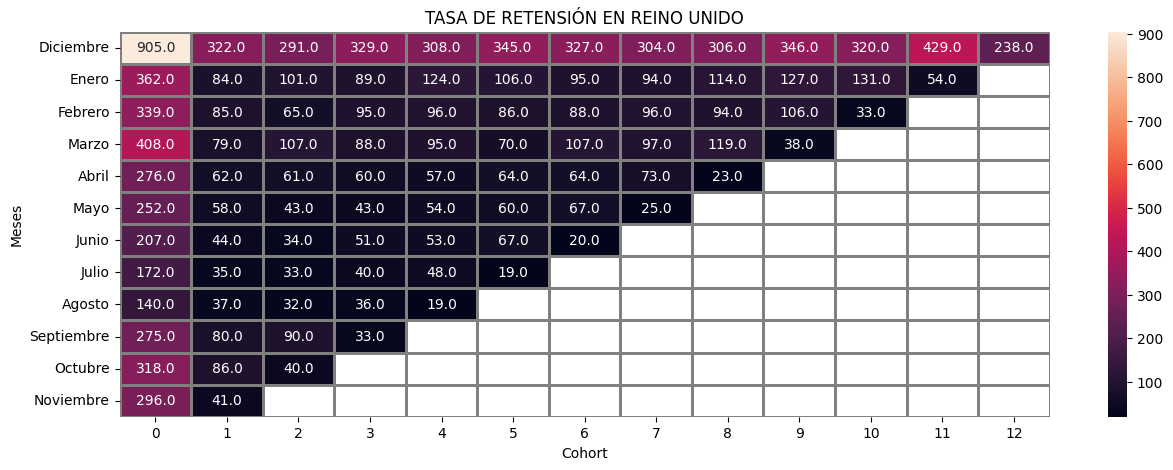

In [ ]:
# Mapa de calor para cohorte de reino unido
plt.figure(figsize=(15, 5))
plt.title('TASA DE RETENSIÓN EN REINO UNIDO')

heatmap=sns.heatmap(cohort_invoice_uk,
            annot=True,
            fmt='1',
            linewidths=1,
            linecolor='gray')
heatmap.set_xlabel('Cohort')
heatmap.set_ylabel('Meses')
index = ['Diciembre','Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

### Comportamiento en el tiempo de los usuarios en otros paises

In [ ]:
# Sacar la fecha de inicio de compras de un usuario de otros paises
df_first_date_others = df[df['REGION']!='United Kingdom'].groupby(['CUSTOMER_ID']).agg({'INVOICE_DATE':'min'}).reset_index()
df_first_date_others.columns = ['CUSTOMER_ID','FIRST_DATE']

# Unir los primeros registros
df_first_date_others = df.merge(df_first_date_others, on = 'CUSTOMER_ID')

#Formatear fechas
df_first_date_others['INVOICE_DATE'] = pd.to_datetime(df_first_date_others['INVOICE_DATE'])
df_first_date_others['FIRST_DATE'] = pd.to_datetime(df_first_date_others['FIRST_DATE'])

# Realizar una diferencia del inicio de una actividad de un usuario repecto a su primera actividad en la plataforma, verificando la frecuencia en que regresan
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
df_first_date_others['COHORT_FRECUENCE'] = df_first_date_others.apply(lambda row: diff_month(row['INVOICE_DATE'], row['FIRST_DATE']), axis=1)
df_first_date_others['COHORT_FRECUENCE'] = df_first_date_others['COHORT_FRECUENCE'].astype('int').round()

# Formatear la fecha de inicio de compras
df_first_date_others['FIRST_DATE'] = df_first_date_others['FIRST_DATE'].dt.month

# Tabla pivote contrastando la fecha de inicio y el desarrollo en el tiempo
cohort_invoice_others = df_first_date_others.pivot_table(index = 'FIRST_DATE',
                                                  columns ='COHORT_FRECUENCE',
                                                  values = 'CUSTOMER_ID',
                                                  aggfunc = 'nunique').reset_index()

#Orden de los meses
order = [12,1,2,3,4,5,6,7,8,9,10,11]

# Ordenar el DataFrame por la columna 'FIRST_DATE'
cohort_invoice_others['FIRST_DATE'] = pd.Categorical(cohort_invoice_others['FIRST_DATE'], categories=order, ordered=True)
cohort_invoice_others = cohort_invoice_others.sort_values(by='FIRST_DATE')
cohort_invoice_others = cohort_invoice_others[[0,1,2,3,4,5,6,7,8,9,10,11,12]]

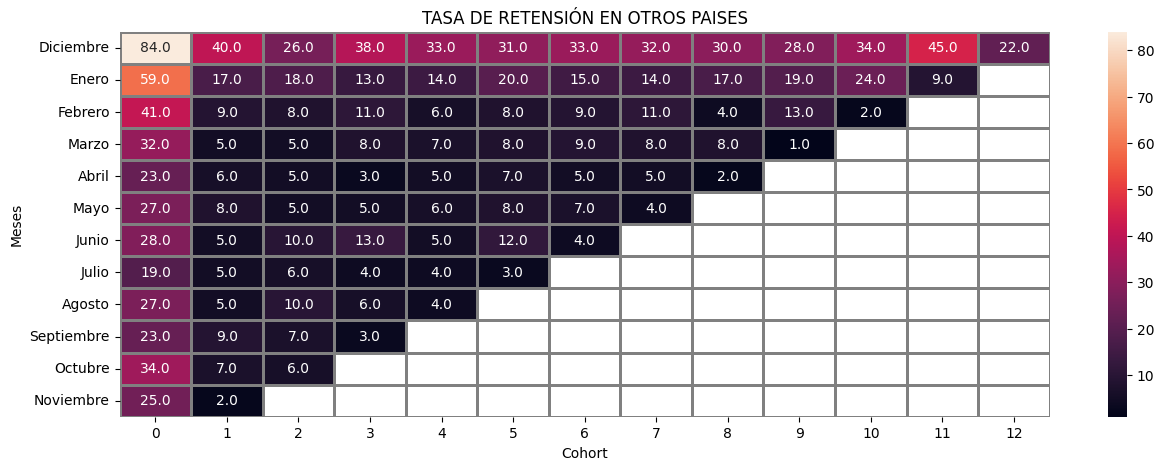

In [ ]:
# Mapa de calor para cohorte
plt.figure(figsize=(15, 5))
plt.title('TASA DE RETENSIÓN EN OTROS PAISES')

heatmap=sns.heatmap(cohort_invoice_others,
            annot=True,
            fmt='1',
            linewidths=1,
            linecolor='gray')
heatmap.set_xlabel('Cohort')
heatmap.set_ylabel('Meses')
index = ['Diciembre','Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

## Cantidad de productos pedidos en el tiempo

In [ ]:
# Sacar la fecha de inicio de compra de productos
df_stock_code_first_date = df.groupby('STOCK_CODE').agg({'INVOICE_DATE':'min'}).reset_index()
df_stock_code_first_date.columns = ['STOCK_CODE','FIRST_DATE']

# Unir las primeras visitas y la tabla de registros
df_stock_code = df.merge(df_stock_code_first_date, on = 'STOCK_CODE')
df_stock_code['INVOICE_DATE'] = pd.to_datetime(df_stock_code['INVOICE_DATE'])
df_stock_code['FIRST_DATE'] = pd.to_datetime(df_stock_code['FIRST_DATE'])

# Realizar una diferencia del inicio de adquisición de un producto repecto a los demas registros, verificando la frecuencia de compra
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
df_stock_code['COHORT_FRECUENCE'] = df_stock_code.apply(lambda row: diff_month(row['INVOICE_DATE'], row['FIRST_DATE']), axis=1)
df_stock_code['COHORT_FRECUENCE'] = df_stock_code['COHORT_FRECUENCE'].astype('int').round()

# Formatear la fecha de inicio de compras
df_stock_code['FIRST_DATE'] = df_stock_code['FIRST_DATE'].dt.month

# Tabla pivote contrastando la feccha de inicio y el desarrollo en el tiempo de compra de productos
cohort_stock_code = df_stock_code.pivot_table(index = 'FIRST_DATE',
                                                  columns ='COHORT_FRECUENCE',
                                                  values = 'STOCK_CODE',
                                                  aggfunc = 'nunique').reset_index()

#Orden de los meses
order = [12,1,2,3,4,5,6,7,8,9,10,11]

# Ordenar el DataFrame por la columna 'FIRST_DATE'
cohort_stock_code['FIRST_DATE'] = pd.Categorical(cohort_stock_code['FIRST_DATE'], categories=order, ordered=True)
cohort_stock_code = cohort_stock_code.sort_values(by='FIRST_DATE')
cohort_stock_code = cohort_stock_code[[0,1,2,3,4,5,6,7,8,9,10,11,12]]


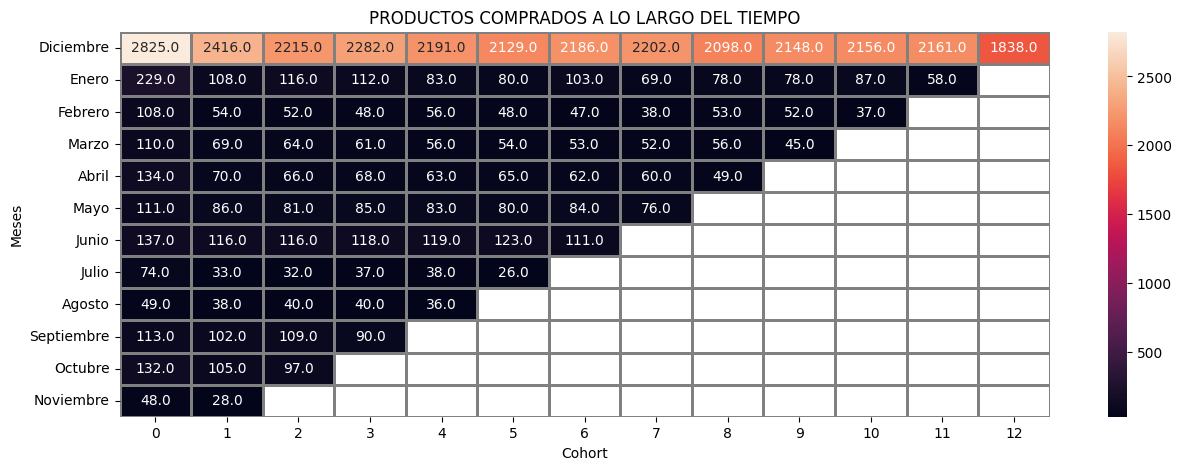

In [ ]:
# Mapa de calor para cohorte
plt.figure(figsize=(15, 5))
plt.title('PRODUCTOS COMPRADOS A LO LARGO DEL TIEMPO')

heatmap=sns.heatmap(cohort_stock_code,
            annot=True,
            fmt='1',
            linewidths=1,
            linecolor='gray')
heatmap.set_xlabel('Cohort')
heatmap.set_ylabel('Meses')
index = ['Diciembre','Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

### Cantidad de productos pedidos en Reino Unido

In [ ]:
# Sacar la fecha de inicio de compra de productos de reino unido
df_stock_code_first_date_uk = df[df['REGION']=='United Kingdom'].groupby(['STOCK_CODE']).agg({'INVOICE_DATE':'min'}).reset_index()
df_stock_code_first_date_uk.columns = ['STOCK_CODE','FIRST_DATE']

# Unir las primeras visitas y la tabla de registros
df_stock_code_uk = df.merge(df_stock_code_first_date_uk, on = 'STOCK_CODE')
df_stock_code_uk['INVOICE_DATE'] = pd.to_datetime(df_stock_code_uk['INVOICE_DATE'])
df_stock_code_uk['FIRST_DATE'] = pd.to_datetime(df_stock_code_uk['FIRST_DATE'])

# Realizar una diferencia del inicio de adquisición de un producto repecto a los demas registros, verificando la frecuencia de compra
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
df_stock_code_uk['COHORT_FRECUENCE'] = df_stock_code_uk.apply(lambda row: diff_month(row['INVOICE_DATE'], row['FIRST_DATE']), axis=1)
df_stock_code_uk['COHORT_FRECUENCE'] = df_stock_code_uk['COHORT_FRECUENCE'].astype('int').round()

# Formatear la fecha de inicio de compras
df_stock_code_uk['FIRST_DATE'] = df_stock_code_uk['FIRST_DATE'].dt.month

# Tabla pivote contrastando la feccha de inicio y el desarrollo en el tiempo de compra de productos
cohort_stock_code_uk = df_stock_code_uk.pivot_table(index = 'FIRST_DATE',
                                                  columns ='COHORT_FRECUENCE',
                                                  values = 'STOCK_CODE',
                                                  aggfunc = 'nunique').reset_index()

#Orden de los meses
order = [12,1,2,3,4,5,6,7,8,9,10,11]

# Ordenar el DataFrame por la columna 'FIRST_DATE'
cohort_stock_code_uk['FIRST_DATE'] = pd.Categorical(cohort_stock_code_uk['FIRST_DATE'], categories=order, ordered=True)
cohort_stock_code_uk = cohort_stock_code_uk.sort_values(by='FIRST_DATE')
cohort_stock_code_uk = cohort_stock_code_uk[[0,1,2,3,4,5,6,7,8,9,10,11,12]]

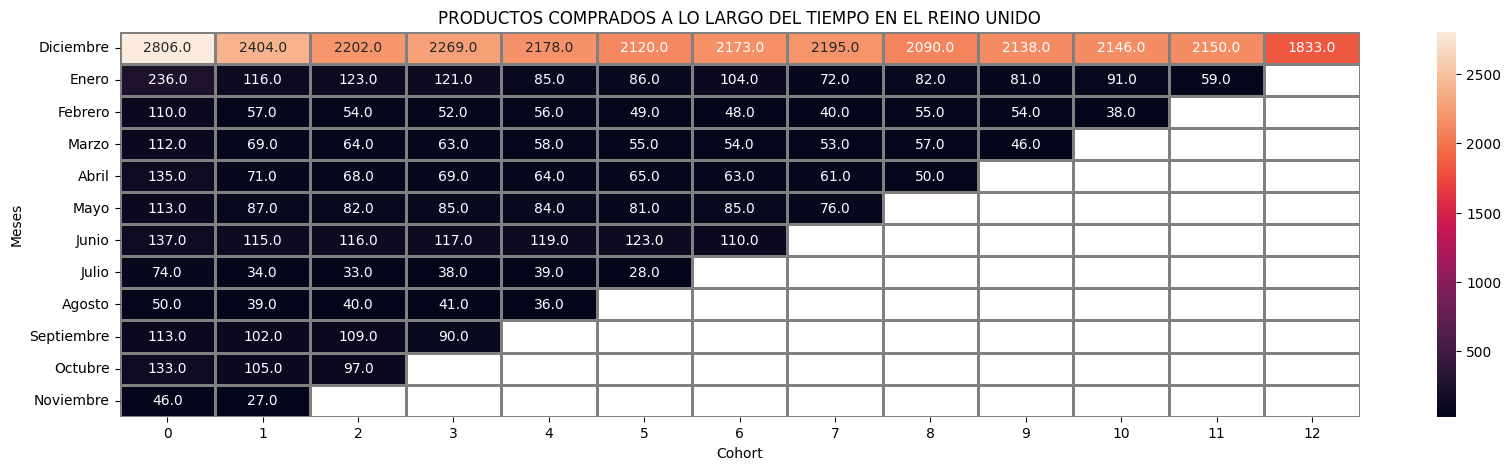

In [ ]:
# Mapa de calor para cohorte
plt.figure(figsize=(20, 5))
plt.title('PRODUCTOS COMPRADOS A LO LARGO DEL TIEMPO EN EL REINO UNIDO')

heatmap=sns.heatmap(cohort_stock_code_uk,
            annot=True,
            fmt='1',
            linewidths=1,
            linecolor='gray')
heatmap.set_xlabel('Cohort')
heatmap.set_ylabel('Meses')
index = ['Diciembre','Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

### Cantidad de productos pedidos en otro paises

In [ ]:
# Sacar la fecha de inicio de compra de productos de reino unido
df_stock_code_first_date_others = df[df['REGION']!='United Kingdom'].groupby(['STOCK_CODE']).agg({'INVOICE_DATE':'min'}).reset_index()
df_stock_code_first_date_others.columns = ['STOCK_CODE','FIRST_DATE']

# Unir las primeras visitas y la tabla de registros
df_stock_code_others = df.merge(df_stock_code_first_date_others, on = 'STOCK_CODE')
df_stock_code_others['INVOICE_DATE'] = pd.to_datetime(df_stock_code_others['INVOICE_DATE'])
df_stock_code_others['FIRST_DATE'] = pd.to_datetime(df_stock_code_others['FIRST_DATE'])

# Realizar una diferencia del inicio de adquisición de un producto repecto a los demas registros, verificando la frecuencia de compra
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
df_stock_code_others['COHORT_FRECUENCE'] = df_stock_code_others.apply(lambda row: diff_month(row['INVOICE_DATE'], row['FIRST_DATE']), axis=1)
df_stock_code_others['COHORT_FRECUENCE'] = df_stock_code_others['COHORT_FRECUENCE'].astype('int').round()

# Formatear la fecha de inicio de compras
df_stock_code_others['FIRST_DATE'] = df_stock_code_others['FIRST_DATE'].dt.month

# Tabla pivote contrastando la feccha de inicio y el desarrollo en el tiempo de compra de productos
cohort_stock_code_others = df_stock_code_others.pivot_table(index = 'FIRST_DATE',
                                                  columns ='COHORT_FRECUENCE',
                                                  values = 'STOCK_CODE',
                                                  aggfunc = 'nunique').reset_index()

#Orden de los meses
order = [12,1,2,3,4,5,6,7,8,9,10,11]

# Ordenar el DataFrame por la columna 'FIRST_DATE'
cohort_stock_code_others['FIRST_DATE'] = pd.Categorical(cohort_stock_code_others['FIRST_DATE'], categories=order, ordered=True)
cohort_stock_code_others = cohort_stock_code_others.sort_values(by='FIRST_DATE')
cohort_stock_code_others = cohort_stock_code_others[[0,1,2,3,4,5,6,7,8,9,10,11,12]]

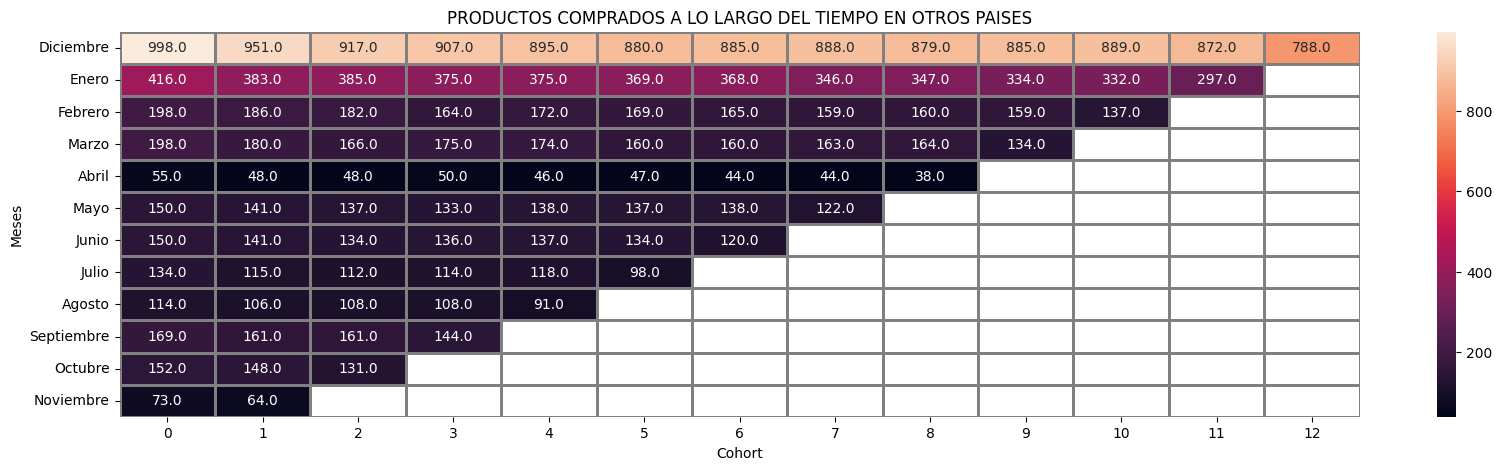

In [ ]:
# Mapa de calor para cohorte
plt.figure(figsize=(20, 5))
plt.title('PRODUCTOS COMPRADOS A LO LARGO DEL TIEMPO EN OTROS PAISES')
heatmap=sns.heatmap(cohort_stock_code_others,
            annot=True,
            fmt='1',
            linewidths=1,
            linecolor='gray')

heatmap.set_xlabel('Cohort')
heatmap.set_ylabel('Meses')
index = ['Diciembre','Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

## Cálculo de Métricas RFM
* Recency: Diferencia entre la última fecha de compra y la fecha actual.
* Frequency: Número de compras que un cliente ha realizado.
* Monetary: Monto total gastado por el cliente.


In [ ]:
# función para separar facturas de compras de facturas con cancelaciones
def split_invoices(row):
  INV_AMOUNT = 0
  CANCEL_INV_AMOUNT = 0
  for element in row['INVOICE_NO']:
    if element.startswith('C'):
      CANCEL_INV_AMOUNT += 1
    else:
      INV_AMOUNT += 1
  return INV_AMOUNT - CANCEL_INV_AMOUNT

In [ ]:
# facturas por cliente
df_frequency = df_clean.groupby('CUSTOMER_ID')['INVOICE_NO'].unique().reset_index()

# Calcular Frequency
df_frequency['FREQUENCY'] = df_frequency.apply(split_invoices, axis=1)
df_frequency.drop(columns=['INVOICE_NO'], inplace=True)

# observar comportamiento
df_frequency.describe()

,CUSTOMER_ID,FREQUENCY
count,4363.000000,4363.000000
mean,15299.772863,3.443731
std,1721.852042,6.434250
min,12346.000000,-6.000000
25%,13813.500000,1.000000
50%,15299.000000,2.000000
75%,16777.500000,4.000000
max,18287.000000,195.000000


Los valores negativos podrían deberse a que hay clientes que devuelven o cancelan 1 sola compra en dos partes.
Estas devoluciones negativas no aportan información a la frecuencia, por lo que se redondean a cero.

In [ ]:
# redondear valores negativos a cero
df_frequency['FREQUENCY'] = df_frequency['FREQUENCY'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
# Definir la fecha actual como la fecha más reciente del dataset
df_current_date = df_clean['INVOICE_DATE'].max()

# Calcular Recency
df_recency = df_clean.groupby('CUSTOMER_ID').agg({'INVOICE_DATE': lambda x: (df_current_date - x.max()).days}).reset_index()
df_recency.columns = ['CUSTOMER_ID', 'RECENCY']

# Calcular Frequency
#df_frequency = df_clean.groupby('CUSTOMER_ID').agg({'INVOICE_NO': 'nunique'}).reset_index()
#df_frequency.columns = ['CUSTOMER_ID', 'FREQUENCY']

# Calcular Monetary
df_monetary = df_clean.groupby('CUSTOMER_ID').agg({'QUANTITY': lambda x: (x * df_clean.loc[x.index, 'UNIT_PRICE']).sum()}).reset_index()
df_monetary.columns = ['CUSTOMER_ID', 'MONETARY']

# Combinar las métricas RFM
df_rfm = df_recency.merge(df_frequency, on='CUSTOMER_ID').merge(df_monetary, on='CUSTOMER_ID')

# Mostrar las primeras filas del DataFrame RFM
df_rfm.head()

,CUSTOMER_ID,RECENCY,FREQUENCY,MONETARY
0,12346,326,0,0.00
1,12347,1,7,4310.00
2,12348,74,4,1437.24
3,12349,18,1,1457.55
4,12350,310,1,294.40


## Analisis de Outliers en df_rfm

Text(0.5, 0, 'Attributes')

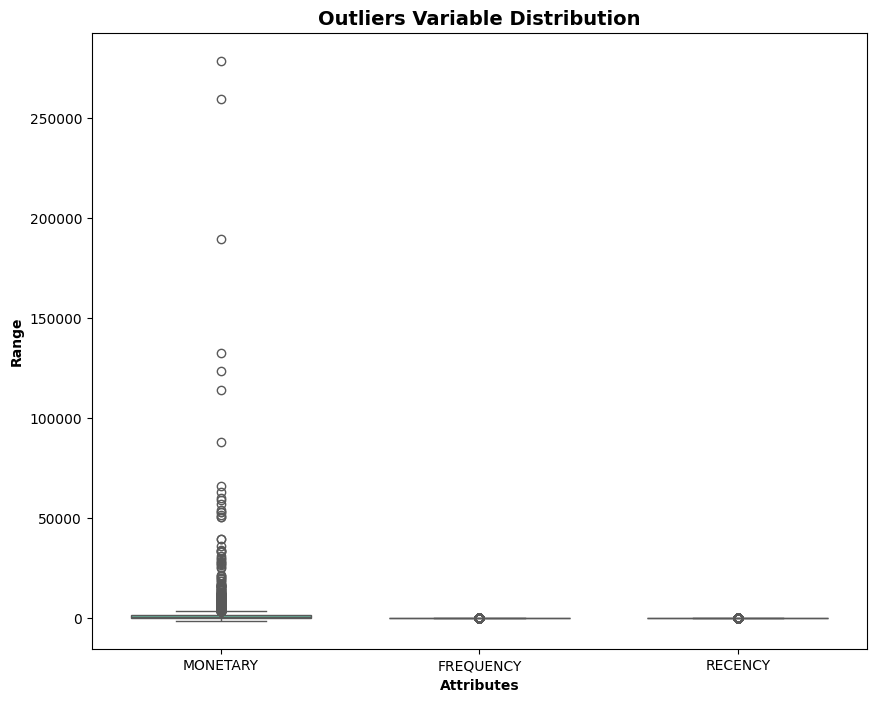

In [ ]:
attributes = ['MONETARY','FREQUENCY','RECENCY']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Dado que podemos ver valores en MONETARY que estan fuera de lo habitual (Outliers) decidimos utilizar la tecnica IQR para eliminarlos

## Eliminacion de outliers

In [ ]:
# Eliminacion de outliers en MONETARY
Q1 = df_rfm.MONETARY.quantile(0.05)
Q3 = df_rfm.MONETARY.quantile(0.95)
IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm.MONETARY >= Q1 - 1.5*IQR) & (df_rfm.MONETARY <= Q3 + 1.5*IQR)]

# Eliminacion de outliers en FREQUENCY
Q1 = df_rfm.FREQUENCY.quantile(0.05)
Q3 = df_rfm.FREQUENCY.quantile(0.95)
IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm.FREQUENCY >= Q1 - 1.5*IQR) & (df_rfm.FREQUENCY <= Q3 + 1.5*IQR)]

#Eliminacion de outliers en RECENCY
Q1 = df_rfm.RECENCY.quantile(0.05)
Q3 = df_rfm.RECENCY.quantile(0.95)
IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm.RECENCY >= Q1 - 1.5*IQR) & (df_rfm.RECENCY <= Q3 + 1.5*IQR)]

Una vez hecho esto vamos a visualizar de nuevo los datos

Text(0.5, 0, 'Attributes')

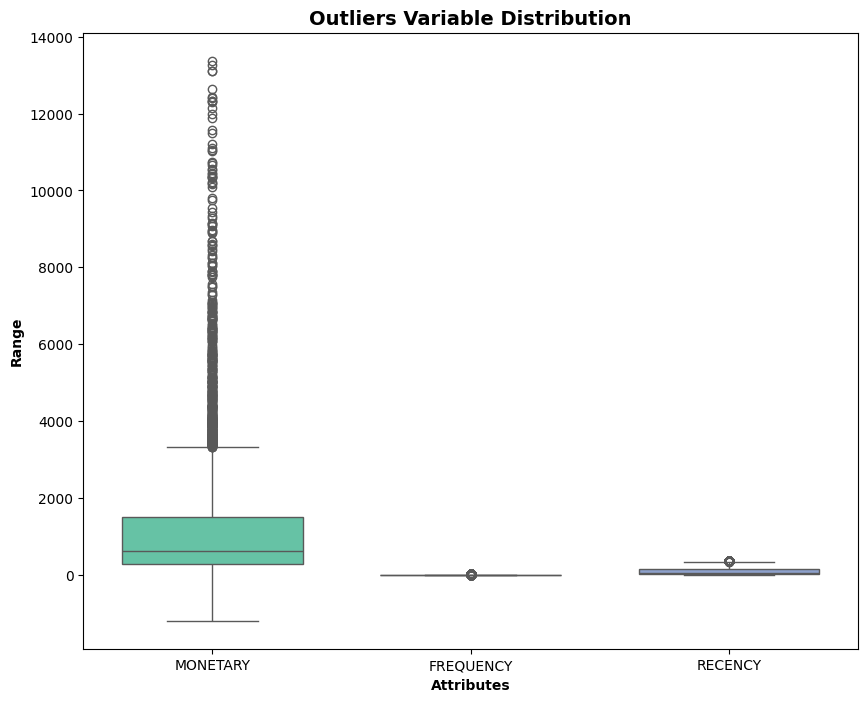

In [ ]:
attributes = ['MONETARY','FREQUENCY','RECENCY']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

## Última compra (recency)

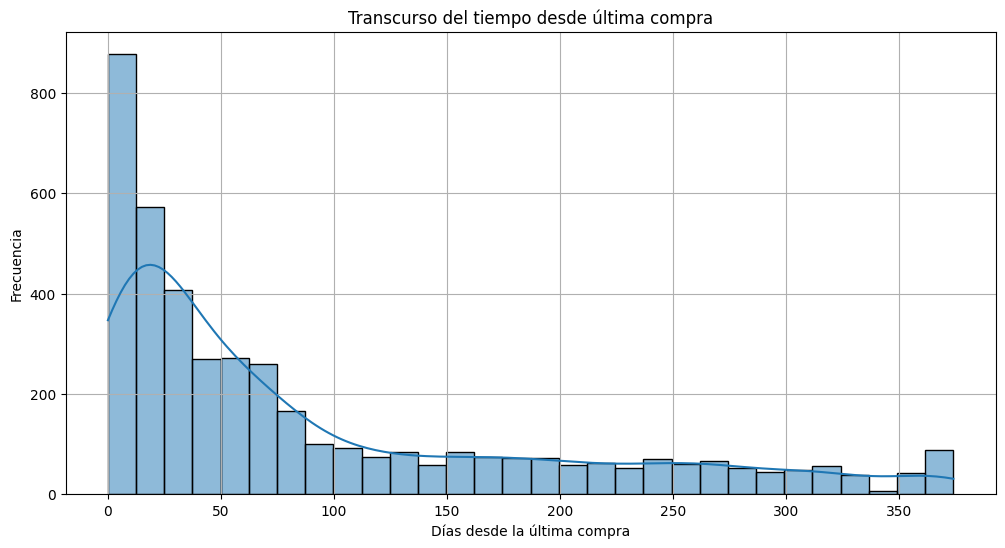

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_rfm['RECENCY'], kde=True, bins=30)
plt.title('Transcurso del tiempo desde última compra')
plt.xlabel('Días desde la última compra')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

'{"bins": [0.0, 12.466666666666667, 24.933333333333334, 37.4, 49.86666666666667, 62.333333333333336, 74.8, 87.26666666666667, 99.73333333333333, 112.2, 124.66666666666667, 137.13333333333333, 149.6, 162.06666666666666, 174.53333333333333, 187.0, 199.46666666666667, 211.93333333333334, 224.4, 236.86666666666667, 249.33333333333334, 261.8, 274.26666666666665, 286.73333333333335, 299.2, 311.6666666666667, 324.1333333333333, 336.6, 349.06666666666666, 361.53333333333336, 374.0], "counts": [0.016413344279721815, 0.010705168675029507, 0.007635854579391679, 0.0050344237300401, 0.005071854389743001, 0.004865985761377051, 0.0031067447553407308, 0.0018902483149964686, 0.001721810346333417, 0.0014036497388587638, 0.0015720877075218174, 0.001104204461235561, 0.001590803037373266, 0.0013849344090073137, 0.0013475037493044133, 0.0013475037493044133, 0.001104204461235561, 0.0011790657806413616, 0.0009731971522754097, 0.001310073089601513, 0.0011416351209384615, 0.001235211770195715, 0.000973197152275

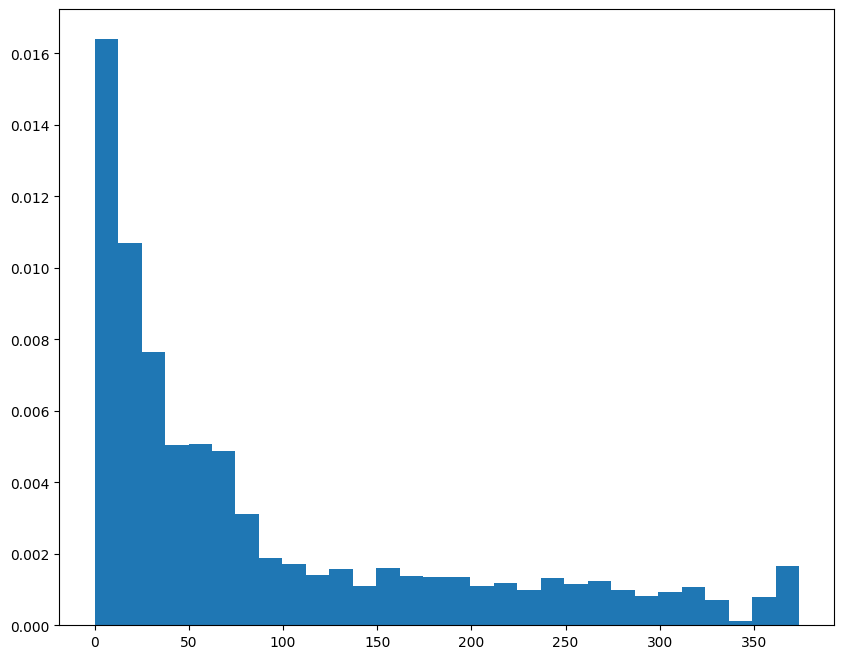

In [ ]:
# grafica a formato Json
data = df_rfm['RECENCY'].values
counts, bins, patches = plt.hist(data, bins=30, density=True)

hist_data = {
    "bins": bins.tolist(),
    "counts": counts.tolist(),
}

json_data = json.dumps(hist_data)
json_data

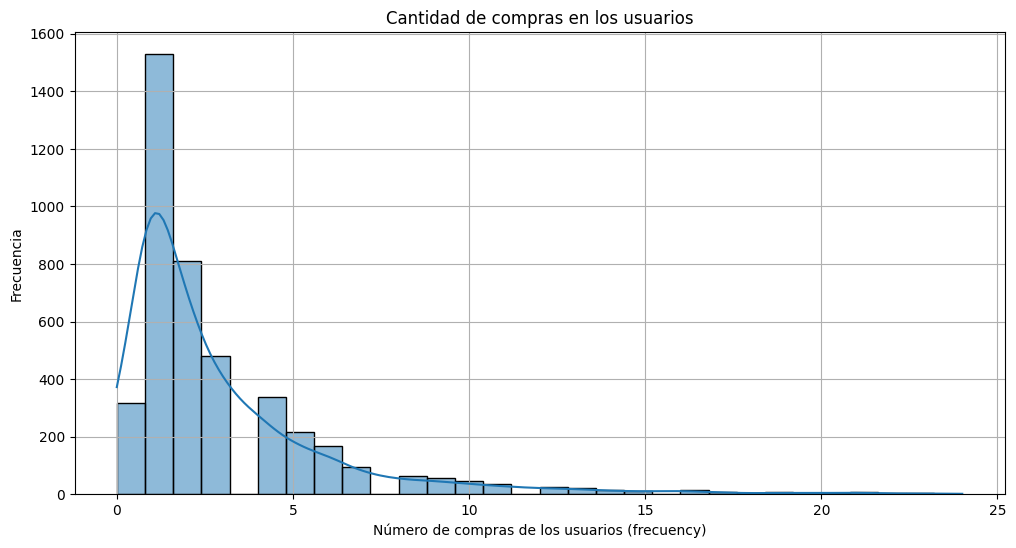

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_rfm['FREQUENCY'], kde=True, bins=30)
plt.title('Cantidad de compras en los usuarios')
plt.xlabel('Número de compras de los usuarios (frecuency)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

'{"bins": [0.0, 0.8, 1.6, 2.4000000000000004, 3.2, 4.0, 4.800000000000001, 5.6000000000000005, 6.4, 7.2, 8.0, 8.8, 9.600000000000001, 10.4, 11.200000000000001, 12.0, 12.8, 13.600000000000001, 14.4, 15.200000000000001, 16.0, 16.8, 17.6, 18.400000000000002, 19.200000000000003, 20.0, 20.8, 21.6, 22.400000000000002, 23.200000000000003, 24.0], "counts": [0.09245216985534298, 0.4459286047596827, 0.2368175454969668, 0.14028231451236586, 0.0, 0.09886840877274838, 0.06328744750349978, 0.048705086327578175, 0.02712319178721419, 0.0, 0.01895706952869807, 0.016915538964069044, 0.013124125058329463, 0.009916005599626684, 0.0, 0.007582827811479228, 0.006707886140923933, 0.004374708352776487, 0.0034997666822211824, 0.0, 0.004374708352776477, 0.002333177788147455, 0.0011665888940737275, 0.0017498833411105912, 0.0, 0.0014582361175921592, 0.002041530564629023, 0.0008749416705552956, 0.0008749416705552956, 0.0005832944470368663]}'

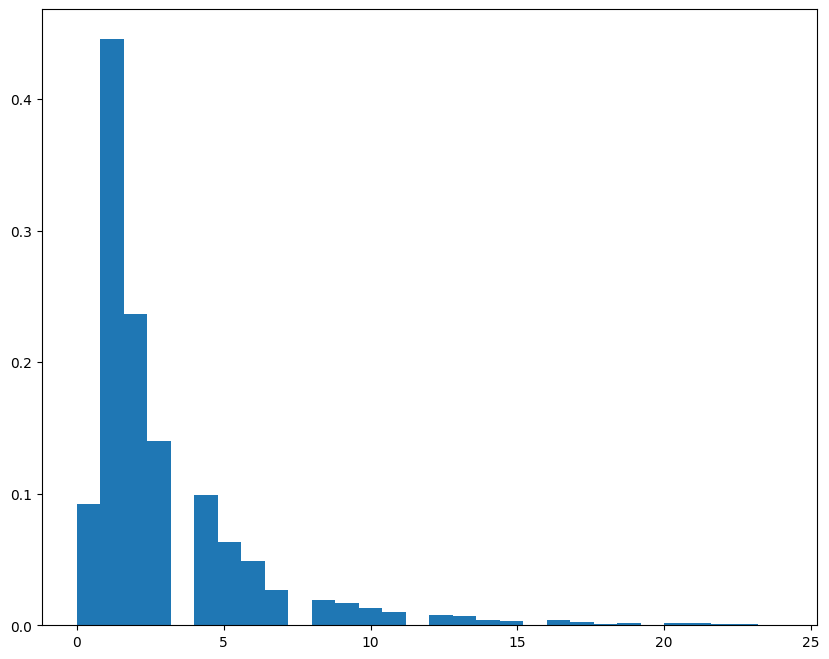

In [ ]:
# grafica a formato Json
data = df_rfm['FREQUENCY'].values
counts, bins, patches = plt.hist(data, bins=30, density=True)

hist_data = {
    "bins": bins.tolist(),
    "counts": counts.tolist(),
}

json_data = json.dumps(hist_data)
json_data

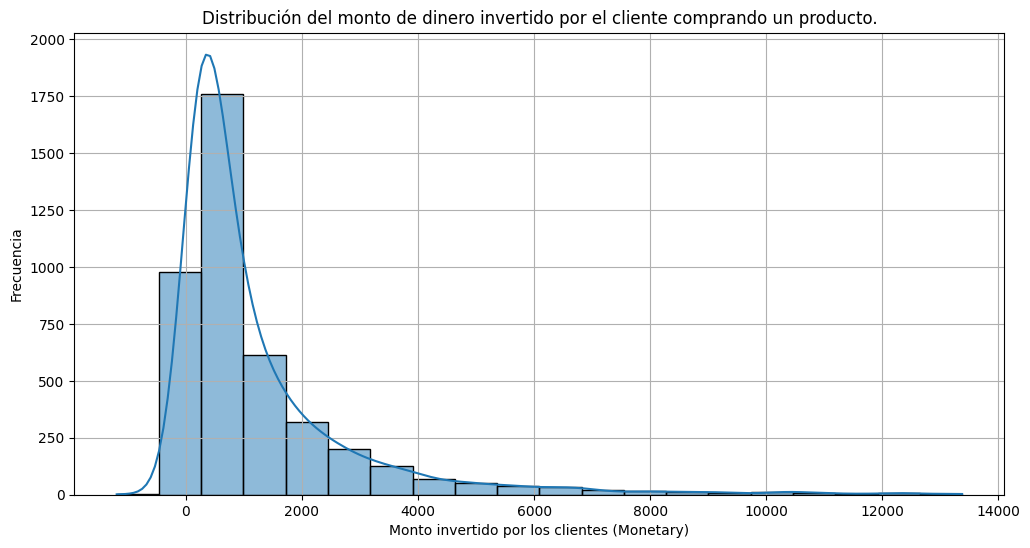

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_rfm['MONETARY'], kde=True, bins=20)
plt.title('Distribución del monto de dinero invertido por el cliente comprando un producto.')
plt.xlabel('Monto invertido por los clientes (Monetary)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

'{"bins": [-1192.2000000000003, -706.5976666666669, -220.99533333333352, 264.60699999999997, 750.2093333333332, 1235.8116666666665, 1721.4140000000002, 2207.0163333333335, 2692.6186666666667, 3178.221, 3663.8233333333333, 4149.425666666666, 4635.028, 5120.630333333334, 5606.232666666667, 6091.835000000001, 6577.437333333333, 7063.0396666666675, 7548.642, 8034.244333333334, 8519.846666666666, 9005.449, 9491.051333333333, 9976.653666666667, 10462.256000000001, 10947.858333333334, 11433.460666666668, 11919.063, 12404.665333333334, 12890.267666666667, 13375.87], "counts": [9.609417533609285e-07, 1.4414126300413925e-06, 0.00046990051739349386, 0.0006837100575163007, 0.0002834778172414739, 0.0001724890447282865, 0.00011387159777327005, 7.783628202223521e-05, 5.9097917831697106e-05, 4.372284977792225e-05, 3.123060698423021e-05, 1.8738364190538074e-05, 1.8738364190538074e-05, 1.297271367037256e-05, 1.1531301040331122e-05, 1.0570359286970235e-05, 1.0570359286970194e-05, 4.324237890124187e-06, 4

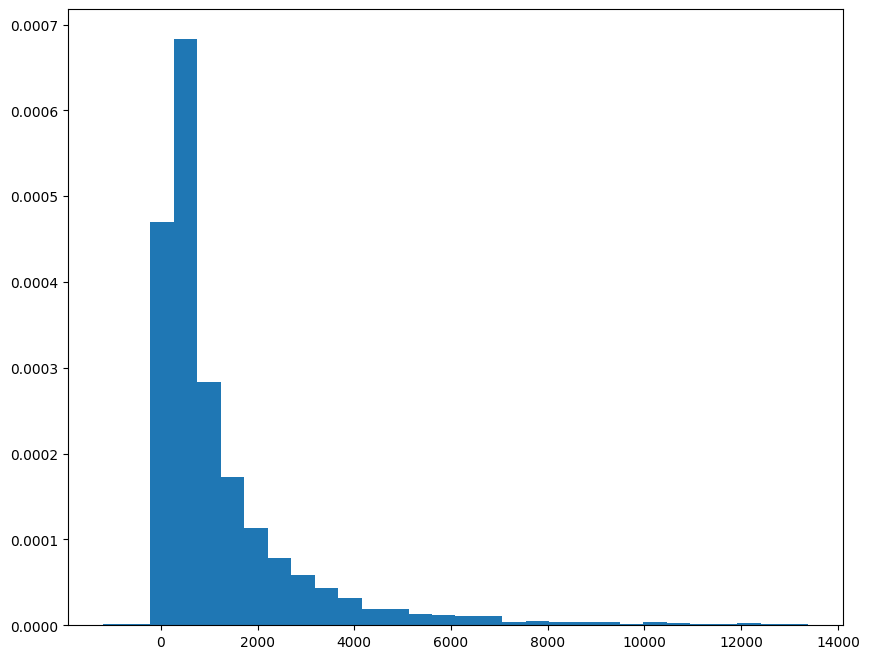

In [ ]:
# grafica a formato Json
data = df_rfm['MONETARY'].values
counts, bins, patches = plt.hist(data, bins=30, density=True)

hist_data = {
    "bins": bins.tolist(),
    "counts": counts.tolist(),
}

json_data = json.dumps(hist_data)
json_data

## Escalada de los datos

In [ ]:
#Escalada de datos
df_rfm_attr = df_rfm[['RECENCY','FREQUENCY','MONETARY']]
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm_attr)
df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ['RECENCY','FREQUENCY','MONETARY']
df_rfm_scaled.head()

,RECENCY,FREQUENCY,MONETARY
0,2.303634,-0.919929,-0.729691
1,-0.904109,1.279427,1.772727
2,-0.183601,0.336846,0.104781
3,-0.736320,-0.605736,0.116573
4,2.145714,-0.605736,-0.558760


### Segmentación de Clientes con Análisis RFM

1. Cálculo de los Puntajes RFM:
    * Asignar puntajes a cada cliente para las métricas Recency, Frequency y Monetary.
    * Dividir a los clientes en segmentos basados en sus puntajes.
2. Asignación de los Segmentos:
    * Definir categorías para los clientes (e.g., clientes leales, clientes inactivos, etc.) basadas en sus puntajes RFM.

## K-MEANS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


## Metodo del Codo



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

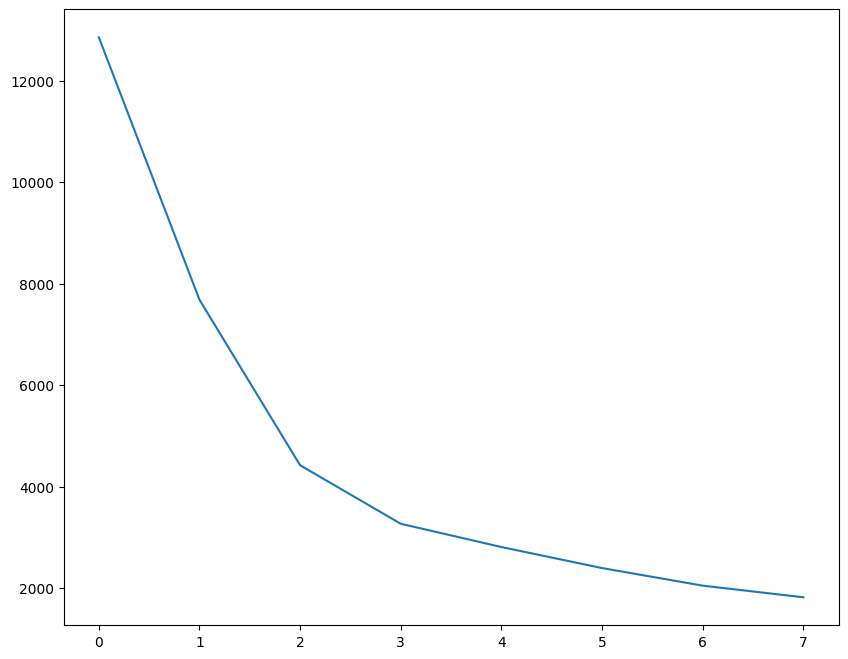

In [ ]:
# Metodo del Codo

ssd = []
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_rfm_scaled)

    ssd.append(kmeans.inertia_)

# Grafica del Metodo del Codo para el K optimo
plt.plot(ssd)


Esta gráfica de codo muestra la inercia (WCSS) en función del número de clusters (k) en un análisis de clustering. El "codo" de la gráfica, ubicado alrededor de k=3 (0-4), indica que este es el número óptimo de clusters. A partir de este punto, la reducción de la inercia es menor, lo que sugiere que agregar más clusters no mejora significativamente la compactación de los mismos.

In [ ]:
data = {
    "ssd_values": ssd,
    "range_n_clusters_values": range_n_clusters
}

json_data = json.dumps(data)
json_data

'{"ssd_values": [12858.000000000007, 7682.954017418406, 4419.129406924339, 3265.5474580142863, 2806.8915263420968, 2392.081681057123, 2045.1771480465661, 1816.1947495383606], "range_n_clusters_values": [1, 2, 3, 4, 5, 6, 7, 8]}'

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=1234)
kmeans.fit(df_rfm_scaled)
df_rfm['CLUSTER'] = kmeans.labels_
df_rfm.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CUSTOMER_ID,RECENCY,FREQUENCY,MONETARY,CLUSTER
0,12346,326,0,0.00,1
1,12347,1,7,4310.00,2
2,12348,74,4,1437.24,0
3,12349,18,1,1457.55,0
4,12350,310,1,294.40,1


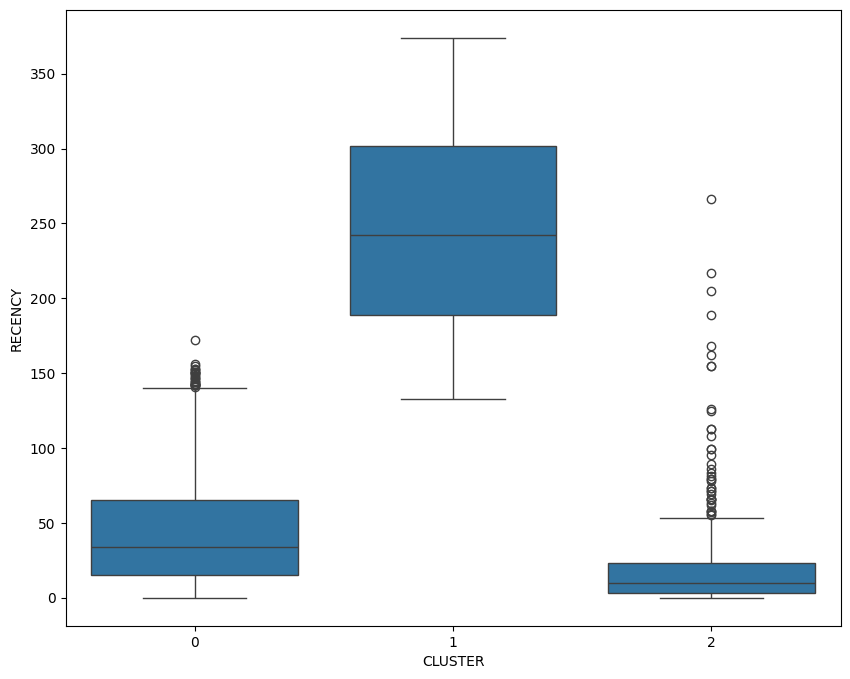

In [ ]:
sns.boxplot(x='CLUSTER', y='RECENCY', data=df_rfm)
plt.show()

In [ ]:
data = {
    "cluster": df_rfm['CLUSTER'].tolist(),
    "recency": df_rfm['RECENCY'].tolist(),
}

json_data = json.dumps(data)
json_data

'{"cluster": [1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2,

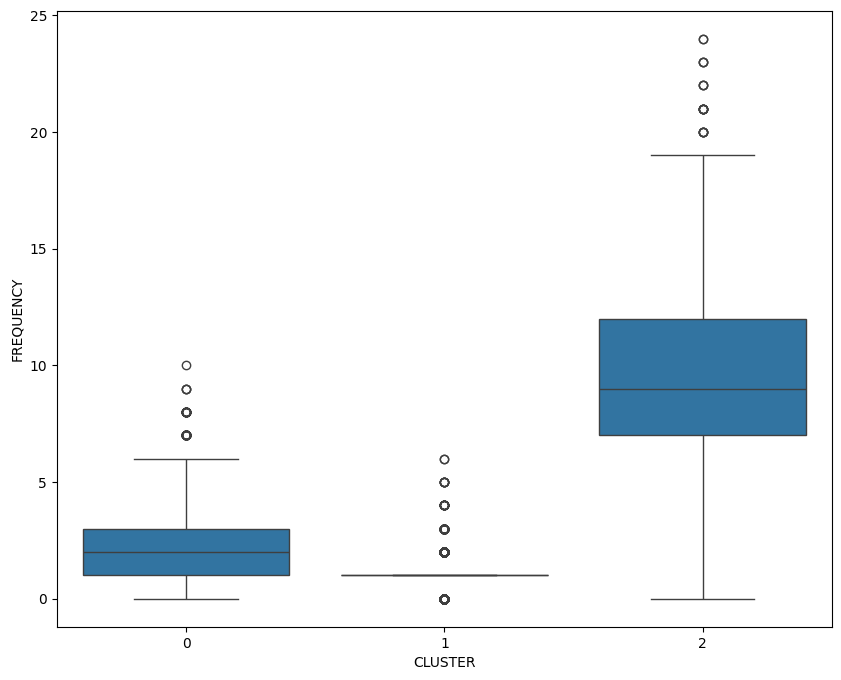

In [ ]:
sns.boxplot(x='CLUSTER', y='FREQUENCY', data=df_rfm)
plt.show()

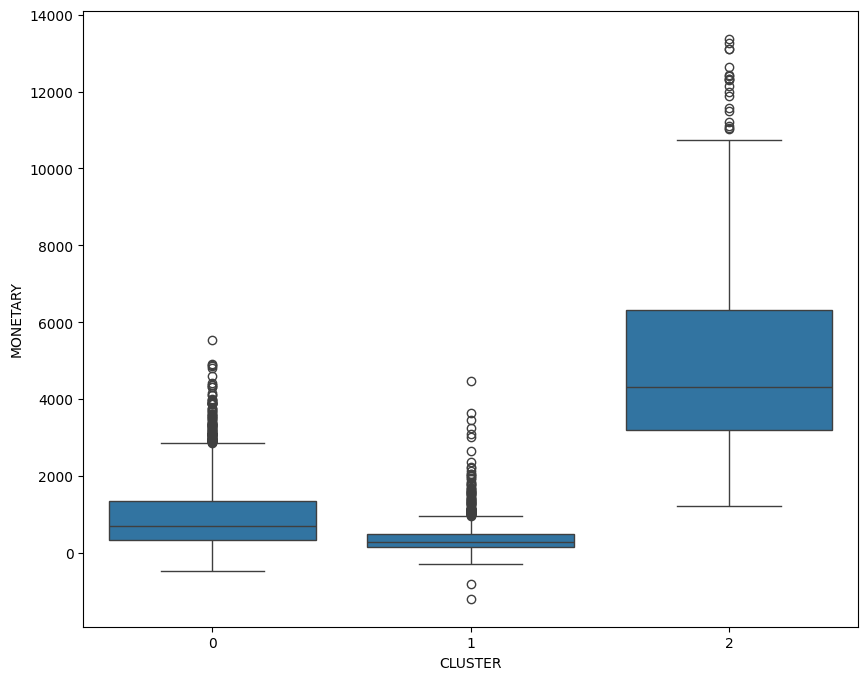

In [ ]:
sns.boxplot(x='CLUSTER', y='MONETARY', data=df_rfm)
plt.show()

**Resumen de los Gráficos de Cluster del RFM**

Recency:
Observamos que tenemos más clientes que realizan compras en intervalos de tiempo más distantes.

Frequency:
Se observa una mayor representación de clientes que han realizado más compras en la tienda en comparación con aquellos que compran pocas veces.

Monetary:
Notamos una mayor concentración de clientes cuyas compras tienden a ser más costosas, seguidos por aquellos con un gasto medio y, en tercer lugar, los clientes con un gasto bajo.

**Por lo que podríamos concluir:**

Recency: Existe una distribución donde la mayoría de los clientes realizan compras en intervalos de tiempo más distantes, lo cual puede implicar diferentes estrategias de reactivación o engagement según la frecuencia de compra de cada grupo.

Frequency: Hay una clara diferencia entre clientes frecuentes, que realizan múltiples compras, y aquellos menos frecuentes. Esto sugiere oportunidades para segmentar y personalizar estrategias de marketing y fidelización según el nivel de actividad de compra de cada segmento.

Monetary: Se observa una distribución donde algunos clientes realizan compras de alto valor, seguidos por clientes con gastos medios y, en tercer lugar, clientes con gastos bajos. Este hallazgo puede influir en las estrategias de upselling, cross-selling y segmentación de clientes según el valor de sus compras.

In [ ]:
# Funcion para ordenar los clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
  new_cluster_field_name = 'new_' + cluster_field_name
  df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
  df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
  df_new['index'] = df_new.index
  df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
  df_final = df_final.drop([cluster_field_name],axis=1)
  df_final = df_final.rename(columns={"index":cluster_field_name})

  return df_final

order_cluster('CLUSTER', 'FREQUENCY', df_rfm, True)

,CUSTOMER_ID,RECENCY,FREQUENCY,MONETARY,CLUSTER
0,12346,326,0,0.00,0
1,12350,310,1,294.40,0
2,12353,203,1,89.00,0
3,12354,231,1,1079.40,0
4,12355,213,1,459.40,0
...,...,...,...,...,...
4281,18276,20,0,323.36,1
4282,18277,57,0,97.63,1
4283,18278,73,1,173.90,1
4284,18282,7,1,176.60,1
